In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import openpyxl
import xlrd

In [ ]:
data = pd.read_csv('masters.csv', sep=';')

In [689]:
data['Region']

0            Алтайский край
1            Алтайский край
2            Алтайский край
3            Алтайский край
4            Алтайский край
               ...         
6707    Ярославская область
6708    Ярославская область
6709    Ярославская область
6710    Ярославская область
6711    Ярославская область
Name: Region, Length: 6712, dtype: object

In [690]:
reg_data = data[['Region', 'Nb budget statements', 'Nb fee based statements']]

In [691]:
reg_data.sum()

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_4791/3041812133.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  reg_data.sum()


Nb budget statements       410355.0
Nb fee based statements    218220.0
dtype: float64

In [692]:
sum_reg_data = reg_data.groupby(['Region']).sum()

In [693]:
sum_reg_data = sum_reg_data.sort_values(by='Nb budget statements', ascending=False).head(5)

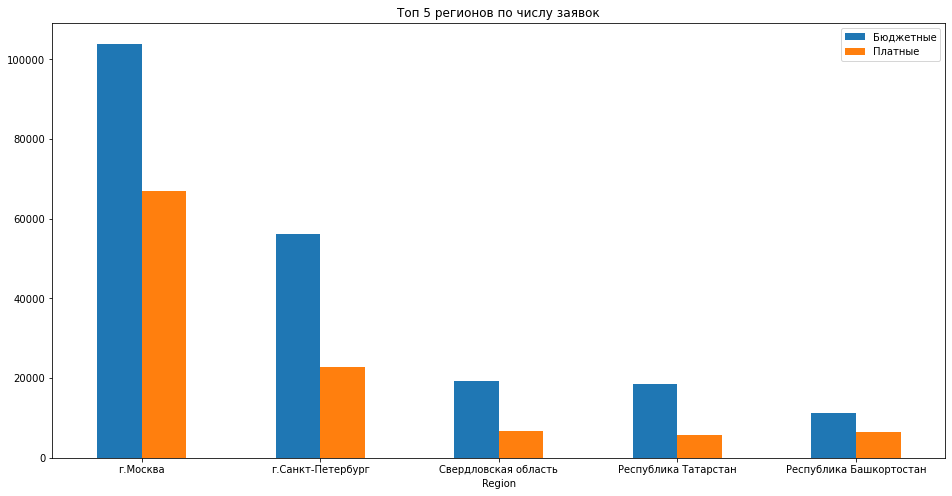

In [783]:
budget = sum_reg_data['Nb budget statements']
fee_based = sum_reg_data['Nb fee based statements']
index = sum_reg_data.index
df = pd.DataFrame({'Бюджетные': budget,
                    'Платные': fee_based}, index=index)
ax = df.plot.bar(rot=0, figsize=(16,8), title='Топ 5 регионов по числу заявок')

In [695]:
prog_data = data[['Educational program', 'Nb budget statements', 'Nb fee based statements']]

In [696]:
prog_data['budget+fee based'] = prog_data['Nb budget statements'] + prog_data['Nb fee based statements']

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_4791/3118736316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prog_data['budget+fee based'] = prog_data['Nb budget statements'] + prog_data['Nb fee based statements']


In [697]:
prog_data

,Educational program,Nb budget statements,Nb fee based statements,budget+fee based
0,Строительство,0.0,39.0,39.0
1,Приборостроение,0.0,1.0,1.0
2,Электроэнергетика и электротехника,0.0,22.0,22.0
3,Продукты питания из растительного сырья,0.0,10.0,10.0
4,Природообустройство и водопользование,0.0,3.0,3.0
...,...,...,...,...
6707,Материаловедение и технологии материалов,0.0,0.0,0.0
6708,Управление качеством,0.0,0.0,0.0
6709,Психология,0.0,25.0,25.0
6710,Юриспруденция,51.0,23.0,74.0


In [698]:
sum_prog_data = prog_data.groupby(['Educational program']).sum()

In [699]:
sum_prog_data = sum_prog_data.sort_values(by='budget+fee based', ascending=False).head(5)

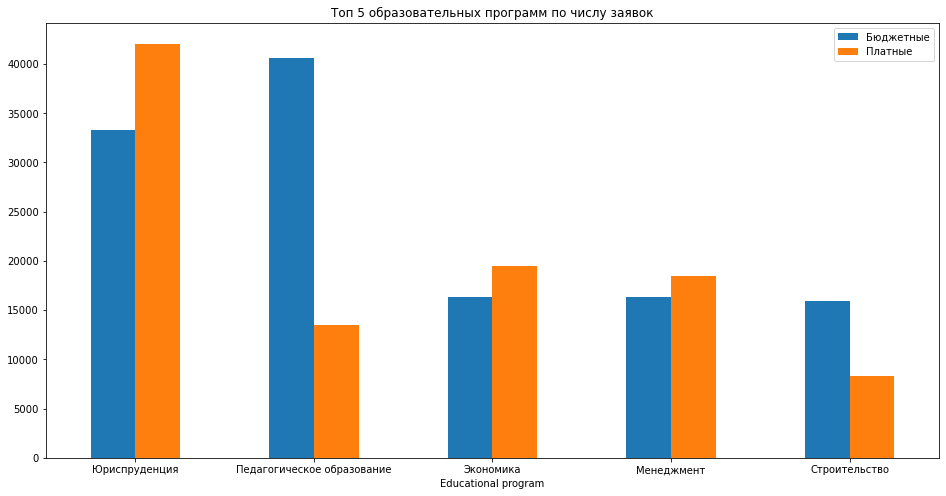

In [782]:
budget = sum_prog_data['Nb budget statements']
fee_based = sum_prog_data['Nb fee based statements']
index = sum_prog_data.index
df = pd.DataFrame({'Бюджетные': budget,
                    'Платные': fee_based}, index=index)
ax = df.plot.bar(rot=0, figsize=(16,8), title='Топ 5 образовательных программ по числу заявок')

In [155]:
national = pd.read_csv('national.csv', sep=';')

In [156]:
national

,Region_name,University_type,Program_format_type,Nationality,Nb enrolled on payed from federal budget,Nb enrolled on payed from sudject budget study,Nb enrolled on payed from local budget study,Nb enrolled on fee based study,Nb of students on payed from federal budget,Nb of student on payed from sudject budget study,Nb of students on payed from local budget study,Nb of students on fee based study,Nb graduated on payed from federal budget,Nb graduated on payed from sudject budget study,Nb graduated on payed from local budget study,Nb graduated on fee based study,Nb enrolled totally,Nb students totally,Nb graduated totally
0,Алтайский край,Государственный,Заочная,Российская Федерация,385.0,0.0,0.0,639.0,1062.0,0.0,0.0,1783.0,414.0,0.0,0.0,428.0,1024.0,2845.0,842.0
1,Алтайский край,Государственный,Заочная,Республика Азербайджан,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Алтайский край,Государственный,Заочная,Республика Армения,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Алтайский край,Государственный,Заочная,Республика Беларусь,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,Алтайский край,Государственный,Заочная,Китай,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10448,Ярославская область,Негосударственный,Очно-Заочная,Республика Таджикистан,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10449,Ярославская область,Негосударственный,Очно-Заочная,Украина,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10450,Ярославская область,Негосударственный,Очно-Заочная,Республика Узбекистан,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10451,Ярославская область,Негосударственный,Очно-Заочная,лица без гражданства,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
nat_data = national[['Nationality', 'Nb enrolled totally', 'Nb students totally', 'Nb graduated totally']]

In [158]:
sum_nat_data = nat_data.groupby(['Nationality']).sum()

In [160]:
sum_nat_data = sum_nat_data.sort_values(by='Nb students totally', ascending=False)

In [161]:
sum_nat_data['enrolled / studs'] = sum_nat_data['Nb enrolled totally'] / sum_nat_data['Nb students totally']

In [165]:
sum_nat_data['grad / enrolled'] = sum_nat_data['Nb graduated totally'] / sum_nat_data['Nb enrolled totally']

In [181]:
sum_nat_data = sum_nat_data.sort_values(by='grad / enrolled', ascending=False)

In [182]:
sum_nat_data = sum_nat_data[sum_nat_data['Nb students totally'] >= 2000]

In [183]:
sum_nat_data

,Nb enrolled totally,Nb students totally,Nb graduated totally,enrolled / studs,grad / enrolled
Nationality,,,,,
Российская Федерация,199945.0,453528.0,165890.0,0.440866,0.829678
Китай,5225.0,10100.0,3812.0,0.517327,0.729569
Республика Узбекистан,1733.0,3068.0,878.0,0.564863,0.506636
Республика Казахстан,6520.0,9753.0,2370.0,0.668512,0.363497
Республика Таджикистан,1509.0,2517.0,481.0,0.599523,0.318754
Туркменистан,1794.0,2756.0,463.0,0.650943,0.258082


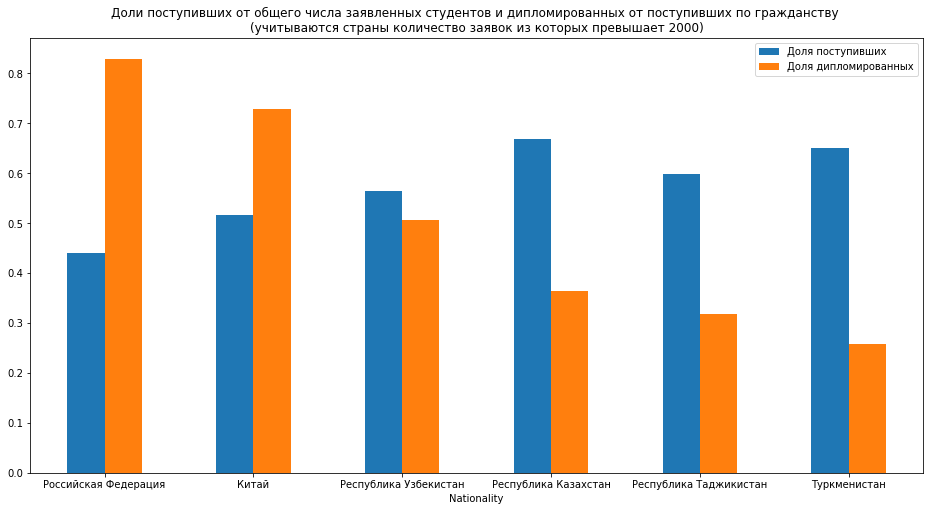

In [188]:
enr_stud_prop = sum_nat_data['enrolled / studs']
grad_enr_prop = sum_nat_data['grad / enrolled']
index = sum_nat_data.index
df = pd.DataFrame({'Доля поступивших': enr_stud_prop,
                    'Доля дипломированных': grad_enr_prop}, index=index)
ax = df.plot.bar(rot=0, figsize=(16,8), title='Доли поступивших от общего числа заявленных студентов и дипломированных от поступивших по гражданству \n(учитываются страны количество заявок из которых превышает 2000)')

In [189]:
form_data = data[['Education form', 'Nb budget statements', 'Nb fee based statements']]

In [191]:
sum_form_data = form_data.groupby(['Education form']).sum()

In [199]:
sum_form_data

,Nb budget statements,Nb fee based statements
Education form,,
заочная,73838.0,94708.0
очная,324614.0,100805.0
очно-заочная,11903.0,22707.0


<Figure size 432x288 with 0 Axes>

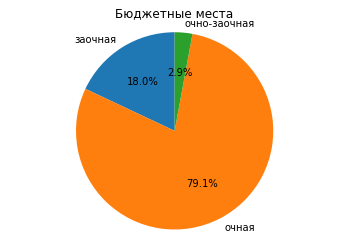

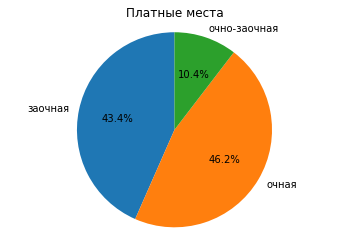

In [212]:
labels = sum_form_data.index
budget_sizes = sum_form_data['Nb budget statements']
fee_sizes = sum_form_data['Nb fee based statements']
plt.figure(0)
fig1, ax1 = plt.subplots()
ax1.pie(budget_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Бюджетные места')
plt.figure(1)
fig1, ax1 = plt.subplots()
ax1.pie(fee_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Платные места')
plt.show()

In [415]:
reg_prog_data = data[['Region', 'Educational program', 'Nb enrolled on fee based study']]
reg_set = {'г.Москва', 'г.Санкт-Петербург', 'Ростовская область',
       'Краснодарский край', 'Самарская область'}

In [416]:
reg_prog_data = reg_prog_data.loc[reg_prog_data['Region'].isin(reg_set)]

In [417]:
reg_prog_data = reg_prog_data.groupby(['Region', 'Educational program']).sum().reset_index()

In [418]:
reg_prog_data = reg_prog_data[reg_prog_data['Nb enrolled on fee based study'] > 100].sort_values(by='Nb enrolled on fee based study', 
                                                                                                 ascending=False)





In [419]:
reg_data = data[['Region', 'Nb enrolled on fee based study']]

In [420]:
sum_reg_data = reg_data.groupby(['Region']).sum()

In [421]:
sum_reg_data = sum_reg_data.sort_values(by='Nb enrolled on fee based study', ascending=False).head(5)

<AxesSubplot:xlabel='Region'>

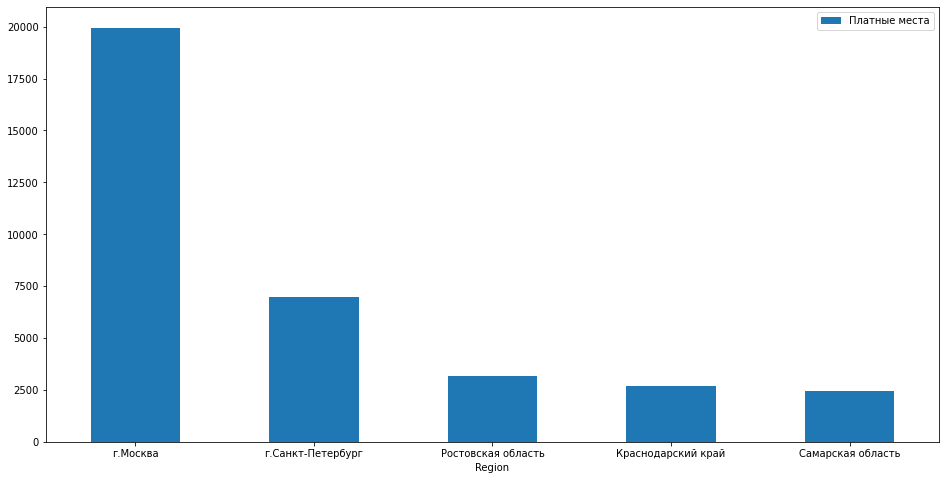

In [370]:
budget = sum_reg_data['Nb enrolled on fee based study']
fee_based = sum_reg_data['Nb enrolled on fee based study']
index = sum_reg_data.index
df = pd.DataFrame({'Платные места': fee_based}, index=index)
df.plot.bar(figsize=(16,8), rot=0)

/Users/levbarbash/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


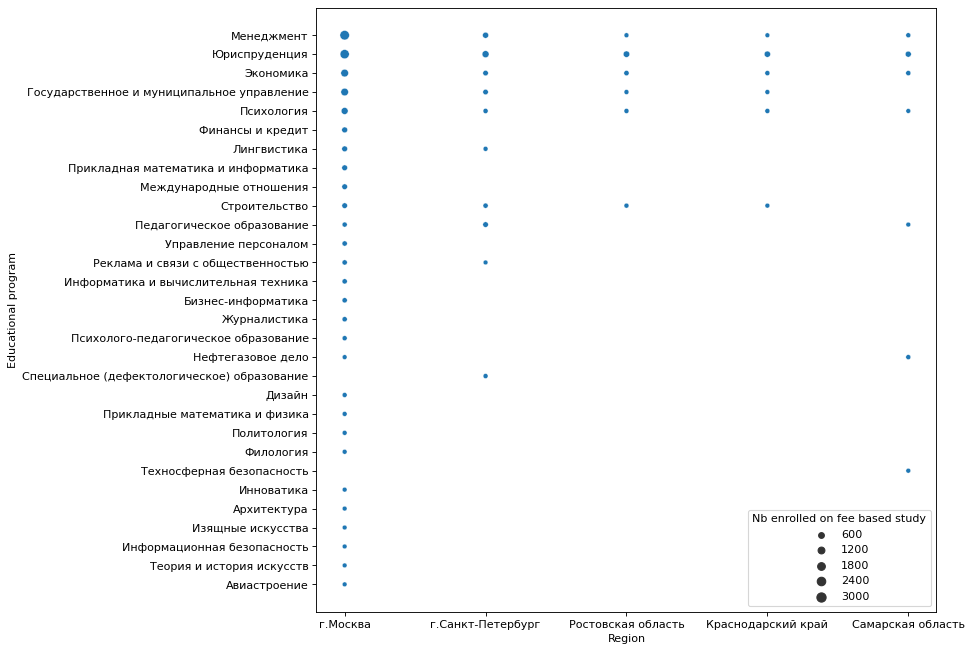

In [348]:
fig, ax = plt.subplots(figsize=(10,10), dpi= 80)    
sns.scatterplot(reg_prog_data['Region'], reg_prog_data['Educational program'], 
                size=reg_prog_data['Nb enrolled on fee based study'], ax=ax)
plt.show()

In [262]:
sum_reg_data.index

Index(['г.Москва', 'г.Санкт-Петербург', 'Ростовская область',
       'Краснодарский край', 'Самарская область'],
      dtype='object', name='Region')

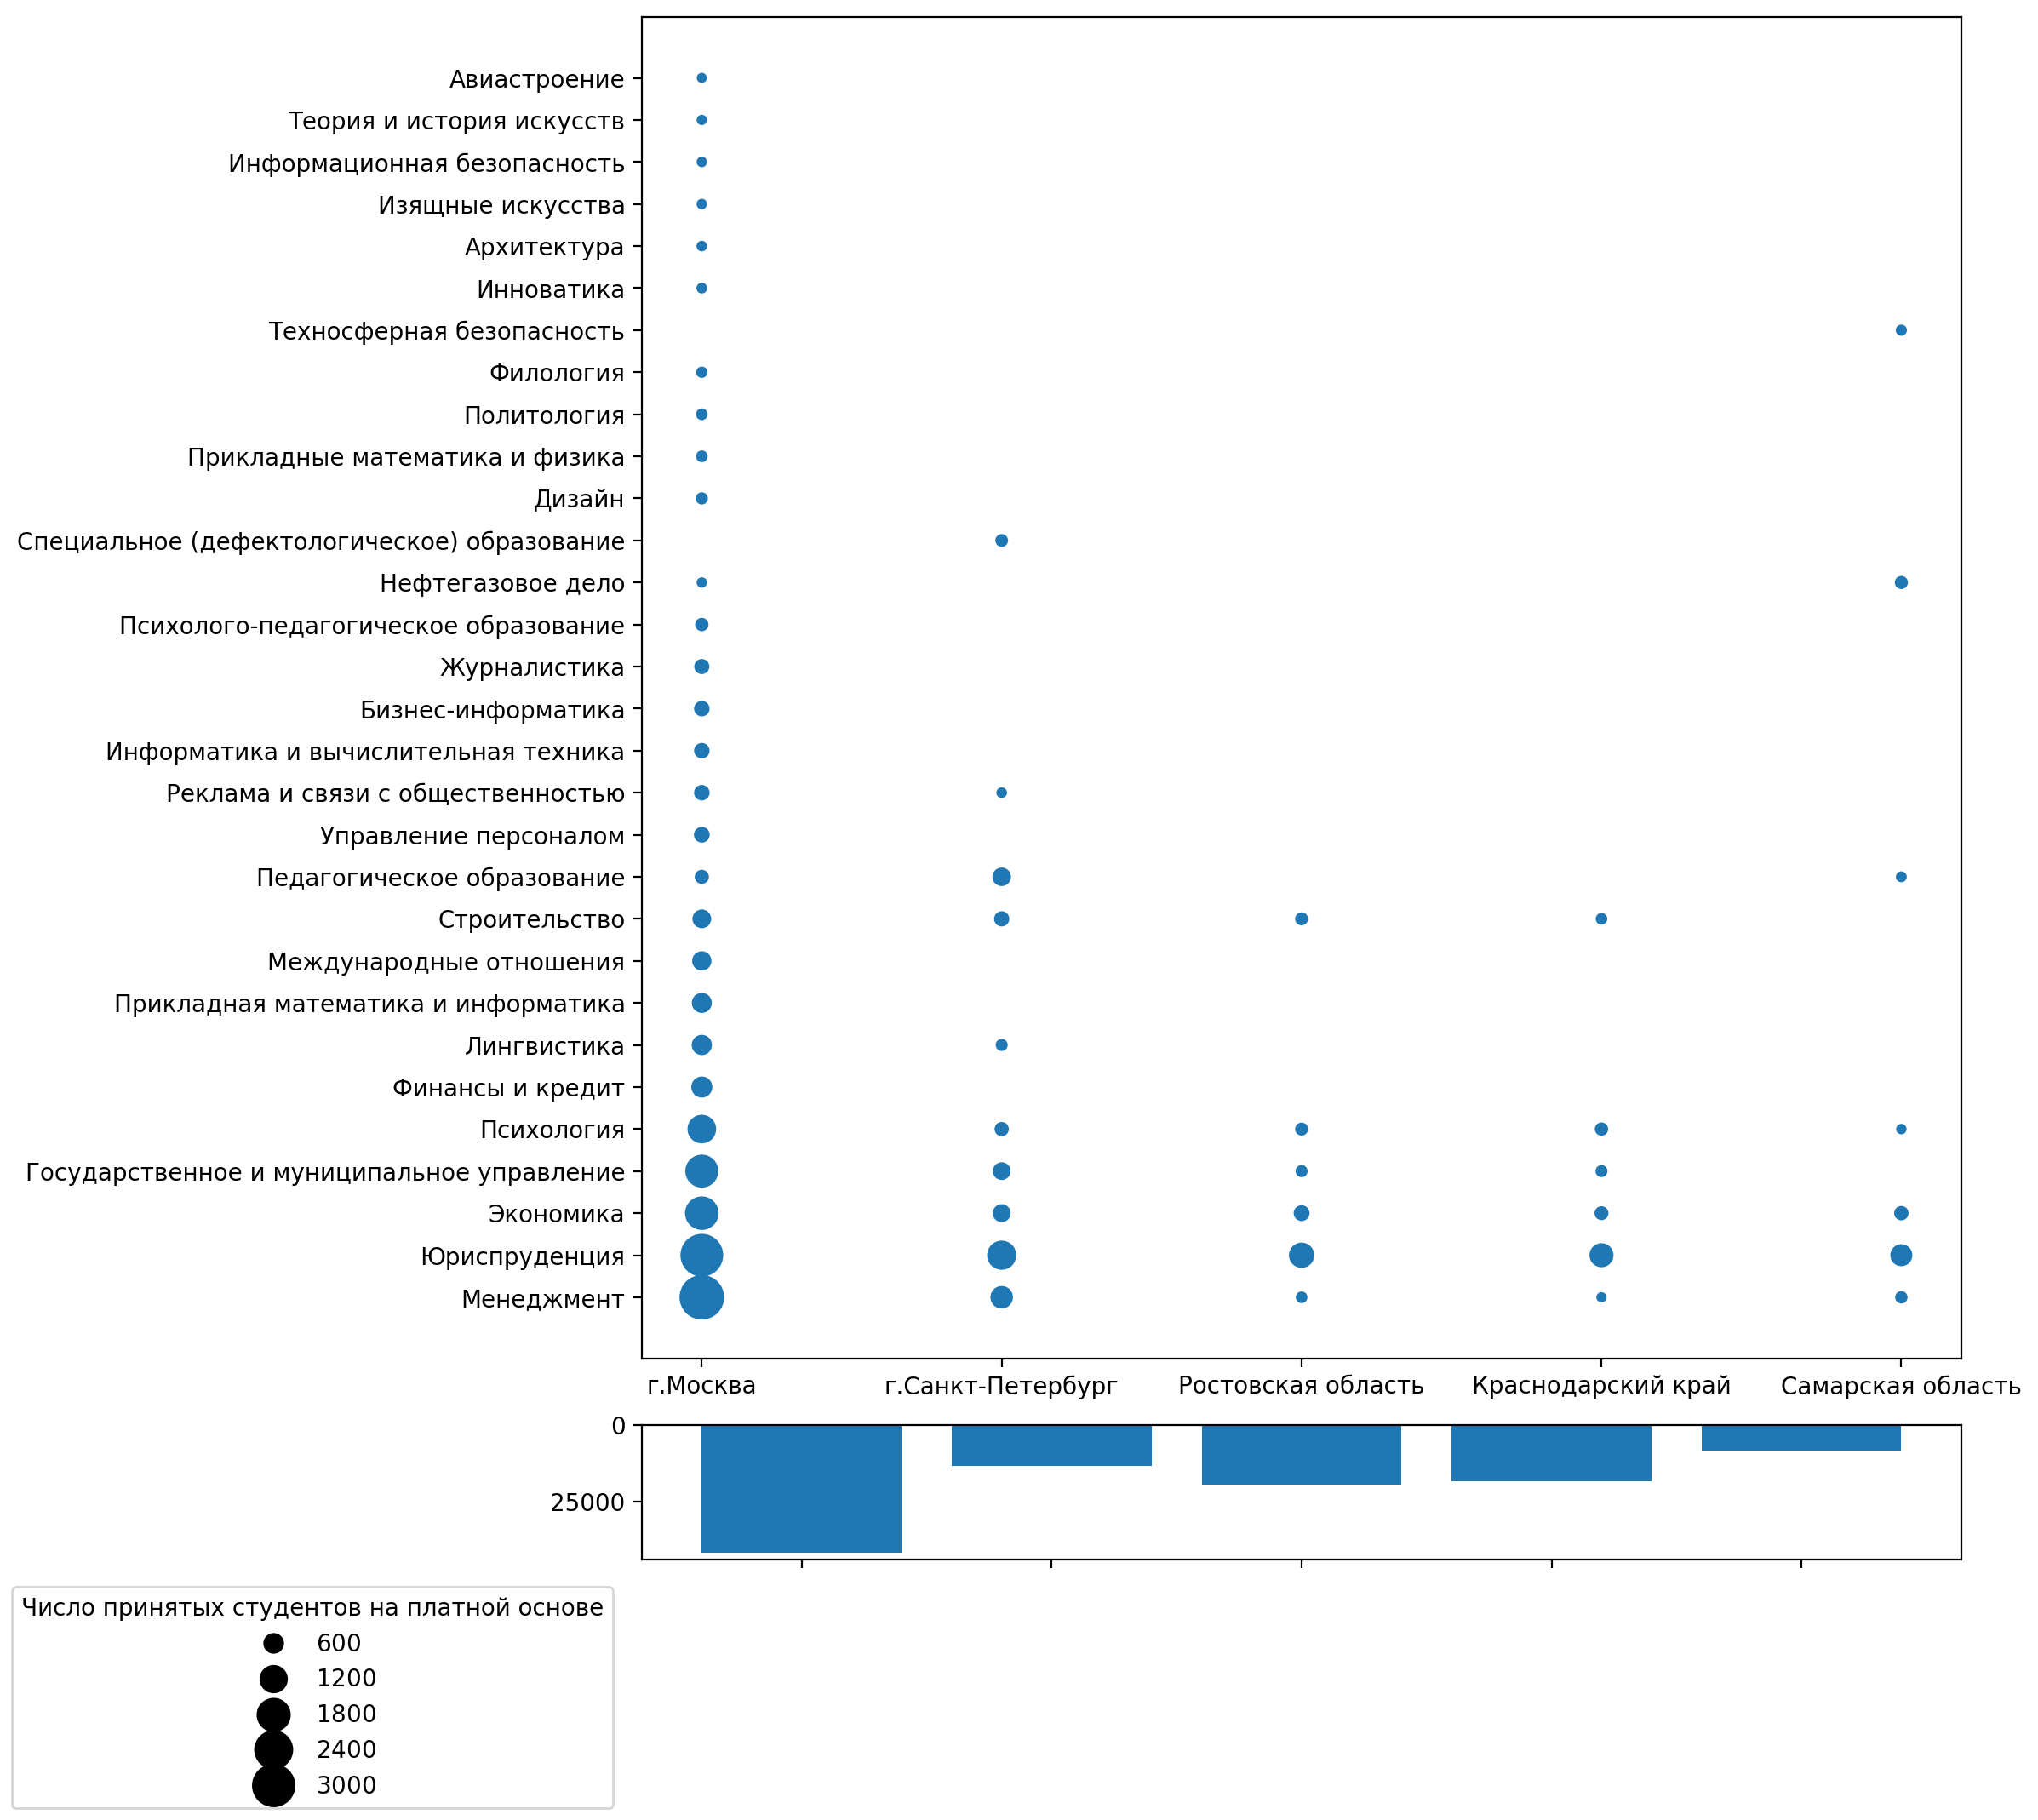

In [677]:
fig = plt.figure(figsize=(10, 12), dpi= 200)
grid = plt.GridSpec(8, 8, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :])
ax_bottom = fig.add_subplot(grid[-1, 0:], xticklabels=[])


scatter = ax_main.scatter('Region', 'Educational program', data=reg_prog_data, 
                s=reg_prog_data['Nb enrolled on fee based study']/10)
handles, labels = scatter.legend_elements(prop="sizes", num=5)
for i in range(len(labels)):
    labels[i] = labels[i][:labels[i].find('0')+1] + '0' + labels[i][labels[i].find('0')+1:]
legend2 = fig.legend(handles, labels, loc="lower left", title="Число принятых студентов на платной основе")

ax_bottom.bar(index, fee_based)
ax_bottom.invert_yaxis()

plt.show()

In [567]:
prog_wom_data = data[['Educational program', 'Nb enrolled with disabilities', 
                      'Nb enrolled on payed from federal budget study', 
                      'Nb enrolled with disabilities on payed from federal budget study', 
                     'Nb enrolled on payed from sudject budget study', 
                      'Nb enrolled on payed from local budget study', 
                     'Nb enrolled on target training', 'Nb enrolled with special rights',
                     'Nb enrolled on fee based study', 'Nb enrolled women']]

In [568]:
sum_prog_wom_data = prog_wom_data.groupby(['Educational program']).sum()

In [569]:
sum_list = ['Nb enrolled with disabilities', 
                      'Nb enrolled on payed from federal budget study', 
                      'Nb enrolled with disabilities on payed from federal budget study', 
                     'Nb enrolled on payed from sudject budget study', 
                      'Nb enrolled on payed from local budget study', 
                     'Nb enrolled on target training', 'Nb enrolled with special rights',
                     'Nb enrolled on fee based study']

In [570]:
sum_prog_wom_data['Total enrolled'] = sum_prog_wom_data[sum_list[0]]
for label in sum_list[1:]:
    sum_prog_wom_data['Total enrolled'] += sum_prog_wom_data[label]

In [571]:
sum_prog_wom_data['Woman prop'] = sum_prog_wom_data['Nb enrolled women'] / sum_prog_wom_data['Total enrolled']

In [572]:
sum_prog_wom_data = sum_prog_wom_data[sum_prog_wom_data['Total enrolled'] > 500].sort_values(by='Woman prop', 
                                                                                          ascending=False)

In [573]:
sum_prog_man_data = sum_prog_wom_data
sum_prog_man_data['Man prop'] = 1 - sum_prog_man_data['Woman prop']

In [574]:
sum_prog_man_data = sum_prog_man_data.sort_values(by='Man prop', ascending=False)

In [577]:
sum_prog_wom_data = sum_prog_wom_data.head(10)

In [578]:
sum_prog_man_data = sum_prog_man_data.head(10)

In [594]:
vis_data_wom = sum_prog_wom_data.sort_values(by='Woman prop', ascending=True)['Woman prop']

In [595]:
vis_data_man = sum_prog_man_data.sort_values(by='Man prop', ascending=True)['Man prop']

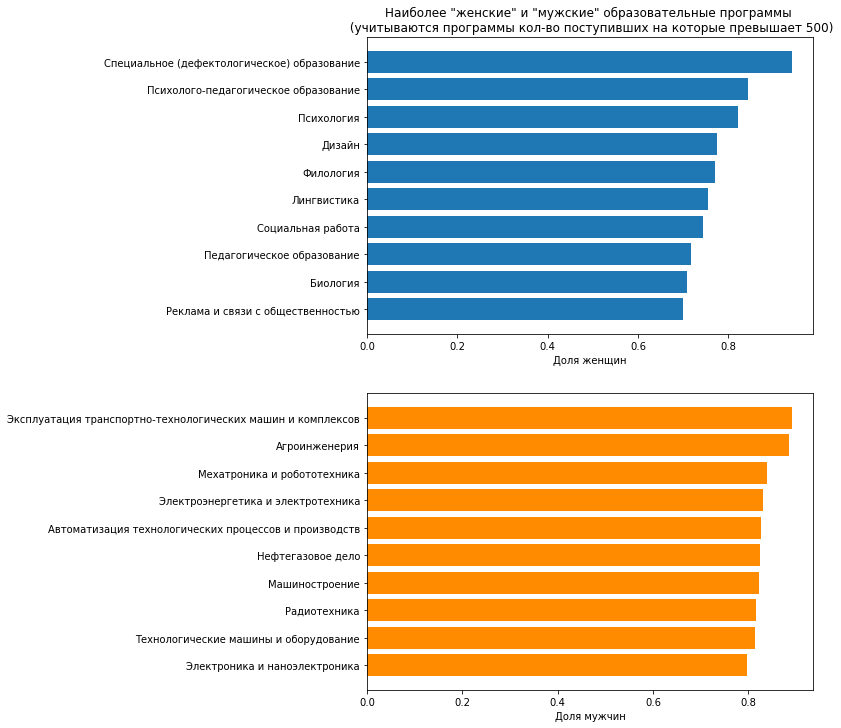

In [603]:
fig = plt.figure(figsize=(8, 12))

plt.subplot(2, 1, 1)

plt.barh(vis_data_wom.index, vis_data_wom)
plt.title('Наиболее "женские" и "мужские" образовательные программы \n (учитываются программы кол-во поступивших на которые превышает 500)')
plt.xlabel("Доля женщин")

plt.subplot(2, 1, 2)

plt.barh(vis_data_man.index, vis_data_man, color='darkorange')
plt.xlabel("Доля мужчин")

plt.show()

In [627]:
for_data = data[['Educational program', 'Nb foreign students', 'Nb students from CIS']]

In [629]:
for_data['Образовательная программа'] = for_data['Educational program']
for_data = for_data.drop(columns=['Educational program'])

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_4791/3466979526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_data['Образовательная программа'] = for_data['Educational program']


In [632]:
sum_for_data = for_data.groupby(['Образовательная программа']).sum()

In [633]:
sum_for_data = sum_for_data.sort_values(by='Nb foreign students', ascending=False).head(10)

In [634]:
sum_for_data = sum_for_data.sort_values(by='Nb foreign students', ascending=True)

In [640]:
sum_for_data

,Nb foreign students,Nb students from CIS,Граждане других стран
Образовательная программа,,,
Информатика и вычислительная техника,332.0,204.0,128.0
Международные отношения,369.0,130.0,239.0
Электроэнергетика и электротехника,389.0,278.0,111.0
Строительство,505.0,267.0,238.0
Лингвистика,512.0,92.0,420.0
Филология,528.0,186.0,342.0
Юриспруденция,533.0,362.0,171.0
Экономика,939.0,430.0,509.0
Менеджмент,1540.0,554.0,986.0


In [635]:
sum_for_data['Граждане других стран'] = sum_for_data['Nb foreign students'] - sum_for_data['Nb students from CIS']

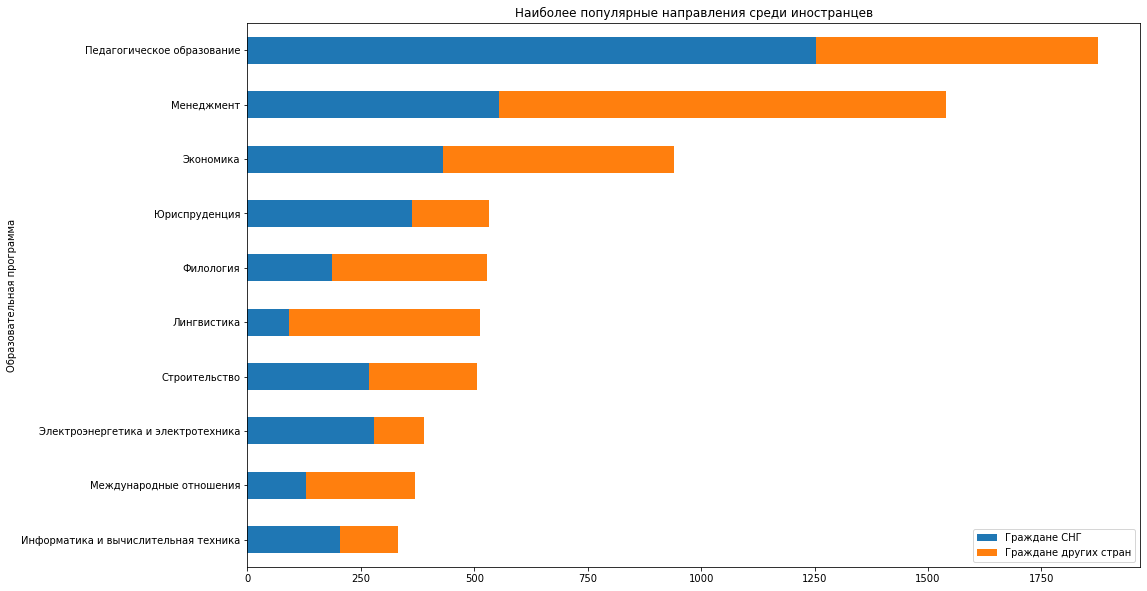

In [644]:
df = pd.DataFrame({'Граждане СНГ': sum_for_data['Nb students from CIS'], 
                   'Граждане других стран': sum_for_data['Граждане других стран']}, index=sum_for_data.index)
ax = df.plot.barh(stacked=True, figsize=(16,10), title='Наиболее популярные направления среди иностранцев')

In [722]:
year_ed_prog = pd.read_csv('year_ed_prog.csv', sep=';')

In [723]:
year_ed_prog = year_ed_prog[['Year', 'Region', 'University type', 
                             'Nb educational programs with online courses', 'Nb students']]

In [724]:
year_ed_prog.loc[year_ed_prog.Year != 2021, 'Nb students'] = year_ed_prog['Nb educational programs with online courses']

In [725]:
year_ed_prog = year_ed_prog[year_ed_prog['University type'] == 'Государственный']
year_ed_prog = year_ed_prog[['Year', 'Region', 'Nb students']]

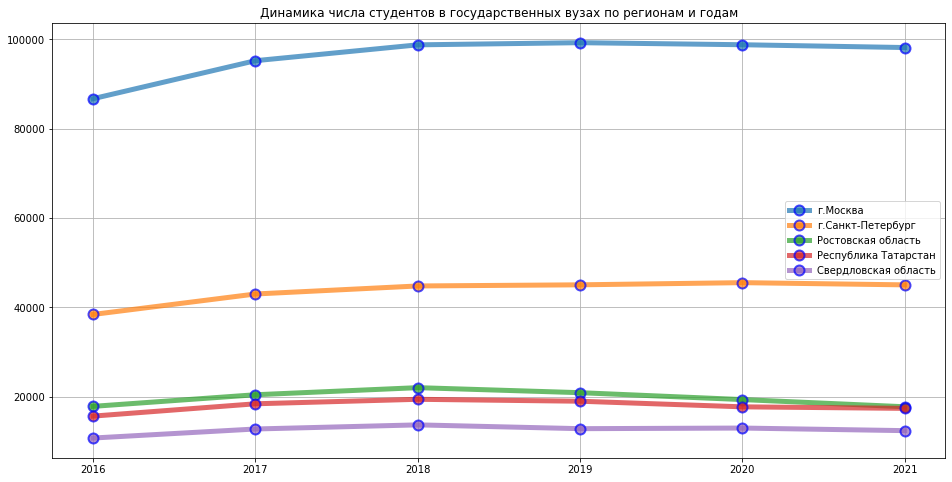

In [807]:
line_regs = year_ed_prog[year_ed_prog.Year == 2021].sort_values(by='Nb students', ascending=False).head(5)['Region']
x = year_ed_prog['Year'].unique()
plt.figure(figsize=(16, 8))
plt.title('Динамика числа студентов в государственных вузах по регионам и годам')
for reg in line_regs:
    plt.plot(x, year_ed_prog.loc[year_ed_prog.Region == reg, 'Nb students'], 'o-',
             label=reg, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.grid(True)

In [353]:
year_fee_enr_rate_data = pd.read_excel(open('VPO_database_v11.xlsx', 'rb'),
              sheet_name='Fact Enrollment results')

In [354]:
year_fee_enr_rate_data = year_fee_enr_rate_data.groupby(['Year', 'Region']).sum().reset_index()

In [355]:
year_fee_enr_rate_data['enrolled_rate'] = year_fee_enr_rate_data['Nb enrolled on fee based educatoion students with higher education'] / year_fee_enr_rate_data['Nb fee based statements from students with higher education']
#year_fee_enr_rate_data[year_fee_enr_rate_data['Year'] == 2019].sort_values(by='Nb enrolled on fee based educatoion students with higher education', 
#                                                                               ascending=False)

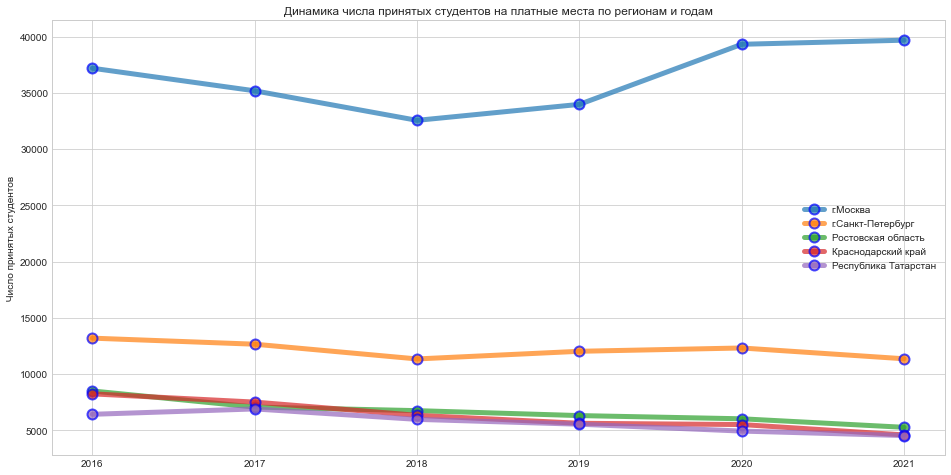

In [356]:
line_regs = year_fee_enr_rate_data[year_fee_enr_rate_data['Year'] == 2016].sort_values(by='Nb enrolled on fee based educatoion students with higher education', 
                                                                                ascending=False).head(5)['Region']
x = year_fee_enr_rate_data['Year'].unique()
plt.figure(figsize=(16, 8))
plt.title('Динамика числа принятых студентов на платные места по регионам и годам')
for reg in line_regs:
    plt.plot(x, year_fee_enr_rate_data.loc[year_fee_enr_rate_data.Region == reg, 
                                           'Nb enrolled on fee based educatoion students with higher education'], 
             'o-', label=reg, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.ylabel('Число принятых студентов')
plt.grid(True)

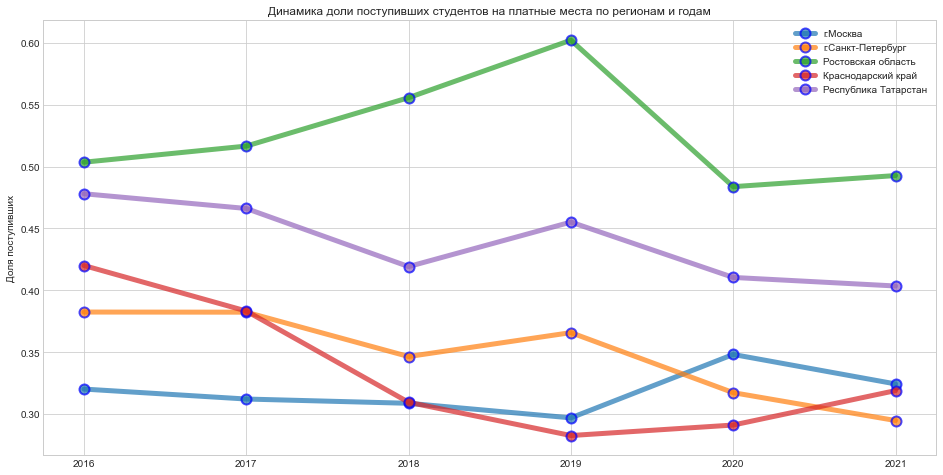

In [357]:
line_regs = year_fee_enr_rate_data[year_fee_enr_rate_data['Year'] == 2016].sort_values(by='Nb enrolled on fee based educatoion students with higher education', 
                                                                                ascending=False).head(5)['Region']
x = year_fee_enr_rate_data['Year'].unique()
plt.figure(figsize=(16, 8))
plt.title('Динамика доли поступивших студентов на платные места по регионам и годам')
for reg in line_regs:
    plt.plot(x, year_fee_enr_rate_data.loc[year_fee_enr_rate_data.Region == reg, 
                                           'enrolled_rate'], 
             'o-', label=reg, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.ylabel('Доля поступивших')
plt.grid(True)

In [194]:
rus_regs = set(year_fee_enr_rate_data[year_fee_enr_rate_data.Year == 2020]['Region'])

In [187]:
def fact_reg_check(fact):
    problem_dict = {}
    for year in range(2016, 2022):
        for un_type in ['Государственный', 'Негосударственный']:
            reg_count = set(fact[(fact['Year'] == year) & (fact['University type'] == un_type)]['Region'])
            if len(reg_count) != 84:
                problem_dict[str(year) + '_' + un_type] = rus_regs - reg_count
    return problem_dict

In [871]:
def mult_sheet_reg_check(file_name, sheet_name_list):
    sheet_reg_dict = {}
    for name in sheet_name_list:
        sheet_check = pd.read_excel(open(file_name, 'rb'),
              sheet_name=name)
        sheet_reg_dict[name] = fact_reg_check(sheet_check)
    return sheet_reg_dict

In [244]:
problem_dict = fact_reg_check(pd.read_excel(open('VPO_database_v9.xlsx', 'rb'),
              sheet_name='Fact Enrollment results'))
new_dict = {}
for key in problem_dict.keys():
    temp_list = list(problem_dict[key])
    for reg in temp_list:
        try:
            temp_excel = xlrd.open_workbook('/Users/levbarbash/Desktop/Барбаш Пакет визуальных решений/Model/Source/' 
                                        + key[:4] + '/' + key[5:-1] + 'е' + '/' + reg + '_' 
                                        + key[5:key.find('у')].upper() + '_очная.xls')
        except:
            break
        temp_sheet = temp_excel.sheet_by_index(temp_excel.sheet_names().index('Р2_10'))
        try:
            value = temp_sheet.cell_value(rowx=8, colx=5)
            try:
                new_dict[key].append(reg)
            except KeyError:
                new_dict[key] = [reg]
        except:
            break
for key in new_dict:
    print(key, new_dict[key])

2016_Государственный ['Республика Крым', 'г.Севастополь']
2019_Государственный ['Республика Саха (Якутия)', 'Республика Крым', 'Белгородская область', 'Амурская область', 'Сахалинская область', 'Ивановская область', 'Приморский край', 'Магаданская область', 'Волгоградская область', 'Краснодарский край', 'Еврейская автономная область', 'Воронежская область', 'Чукотский автономный округ', 'Хабаровский край', 'Республика Калмыкия', 'Астраханская область', 'г.Севастополь', 'Брянская область', 'Ростовская область', 'Камчатский край', 'Республика Бурятия', 'Республика Адыгея', 'Забайкальский край']
2020_Негосударственный ['Республика Крым']


In [ ]:
sheet_fact_name_list = ['Fact - Scholarship', 'Fact - Disabled', 'Fact - Fee based', 'Fact - Target', 
                        'Fact - Moving', 'Fact - Age distribution', 'Fact - Nationality distribution', 
                        'Fact - Enrollment results', 'Fact - Educational programs']
problem_dict = mult_sheet_reg_check('vpo_database_v25.xlsx', sheet_fact_name_list)

In [901]:
problem_dict_vals = list(problem_dict.values())

In [900]:
from iteration_utilities import duplicates

In [904]:
dups = list(duplicates(problem_dict_vals))

In [906]:
dups2 = list(duplicates(dups))

In [911]:
dups3 = list(duplicates(dups2))

In [919]:
for key in problem_dict.keys():
    if problem_dict[key] == dups3[0]:
        print(key)

Fact - Fee based
Fact - Moving
Fact - Age distribution
Fact - Nationality distribution


In [358]:
year_fee_grad_rate_data = pd.read_excel(open('VPO_database_v11.xlsx', 'rb'),
              sheet_name='Fact Fee based')

In [359]:
year_fee_grad_rate_data = year_fee_grad_rate_data.groupby(['Year', 'Region']).sum().reset_index()

In [360]:
year_fee_grad_rate_data['grad / total'] = year_fee_grad_rate_data['Nb graduated totally'] / year_fee_grad_rate_data['Nb of students totally']

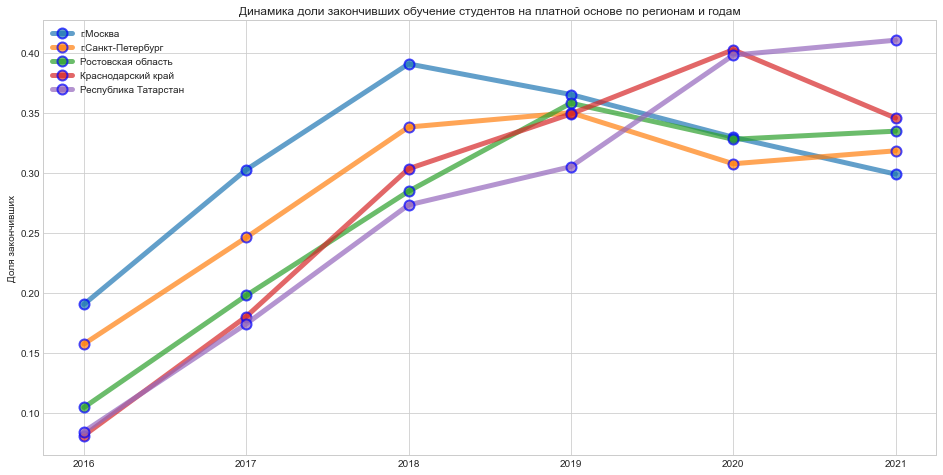

In [361]:
line_regs = year_fee_grad_rate_data[year_fee_grad_rate_data['Year'] == 2016].sort_values(by='Nb of students totally', 
                                                                                ascending=False).head(5)['Region']
x = year_fee_grad_rate_data['Year'].unique()
plt.figure(figsize=(16, 8))
plt.title('Динамика доли закончивших обучение студентов на платной основе по регионам и годам')
for reg in line_regs:
    plt.plot(x, year_fee_grad_rate_data.loc[year_fee_grad_rate_data.Region == reg, 'grad / total'], 'o-',
             label=reg, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.ylabel('Доля закончивших')
plt.grid(True)

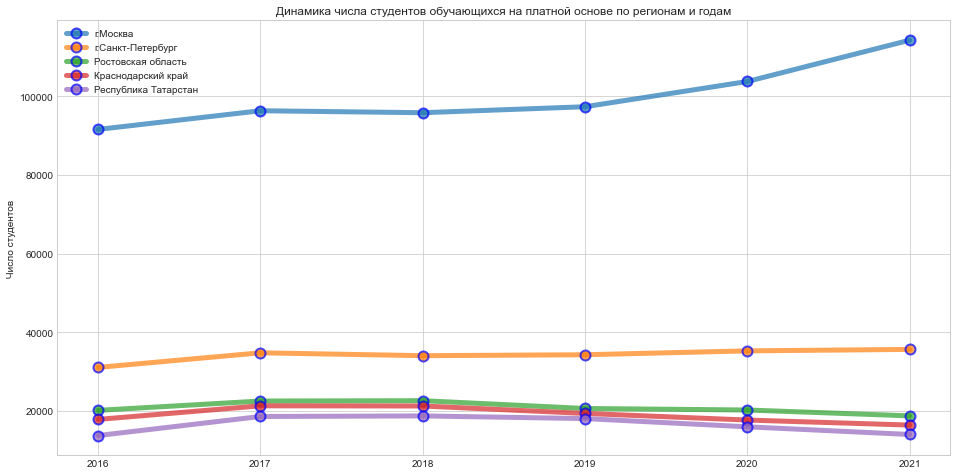

In [362]:
plt.figure(figsize=(16, 8))
plt.title('Динамика числа студентов обучающихся на платной основе по регионам и годам')
for reg in line_regs:
    plt.plot(x, year_fee_grad_rate_data.loc[year_fee_grad_rate_data.Region == reg, 'Nb of students totally'], 'o-',
             label=reg, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.legend()
plt.ylabel('Число студентов')
plt.grid(True)

In [4]:
year_age_data = pd.read_excel(open('VPO_database_finita.xlsx', 'rb'),
              sheet_name='Fact Age distribution')
year_age_data = year_age_data[year_age_data['Year'] == 2021]

In [5]:
year_age_data = year_age_data.groupby(['Age (on Jan 1)']).sum()

In [13]:
year_age_data = year_age_data[year_age_data['Nb students totally'] > 2000]

Text(0.5, 1.0, 'Возрастное соотношение студентов, поступивших в 2021 году')

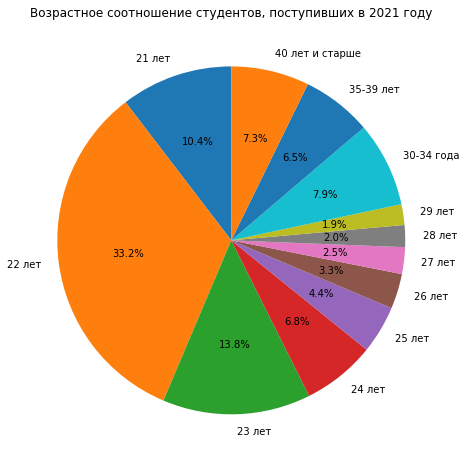

In [18]:
labels = year_age_data.index
age_sizes = year_age_data['Nb enrolled totally']
plt.figure(figsize=(16, 8))
plt.pie(age_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Возрастное соотношение студентов, поступивших в 2021 году')

In [363]:
year_stat_enr_data = pd.read_excel(open('VPO_database_v11.xlsx', 'rb'),
              sheet_name='Fact Statements and enrollments')

In [364]:
year_stat_enr_data = year_stat_enr_data[['Year', 'Educational program', 'Nb budget statements', 
                                         'Nb target training statements', 'Nb special right statements', 
                                         'Nb fee based statements', 'Nb total enrolled']]

In [365]:
year_stat_enr_data = year_stat_enr_data.dropna()
year_stat_enr_data['total stats'] = year_stat_enr_data['Nb budget statements'].astype(float) + year_stat_enr_data['Nb target training statements'] + year_stat_enr_data['Nb special right statements'] + year_stat_enr_data['Nb fee based statements']
year_stat_enr_data = year_stat_enr_data.groupby(['Year', 'Educational program']).sum().reset_index()

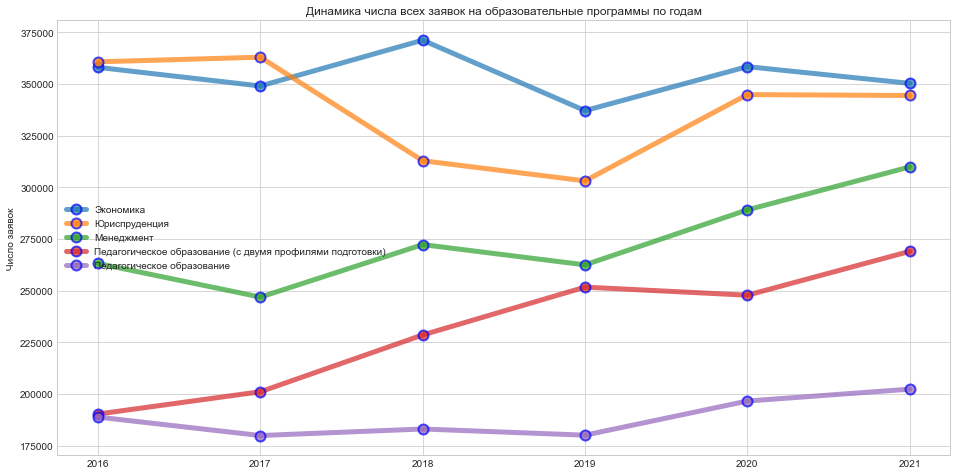

In [367]:
line_prog = year_stat_enr_data[year_stat_enr_data['Year'] == 2021].sort_values(by='total stats', 
                                                                   ascending=False).head(5)['Educational program']
x = year_stat_enr_data['Year'].unique()
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16, 8))
plt.title('Динамика числа всех заявок на образовательные программы по годам')
for prog in line_prog:
    try:
        plt.plot(x, year_stat_enr_data.loc[year_stat_enr_data['Educational program'] == prog, 'total stats'], 'o-',
             label=prog, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
    except ValueError:
        print(prog)
plt.legend()
plt.ylabel('Число заявок')
plt.grid(True)

In [368]:
year_stat_enr_data['enr / stats'] = year_stat_enr_data['Nb total enrolled'] / year_stat_enr_data['total stats']

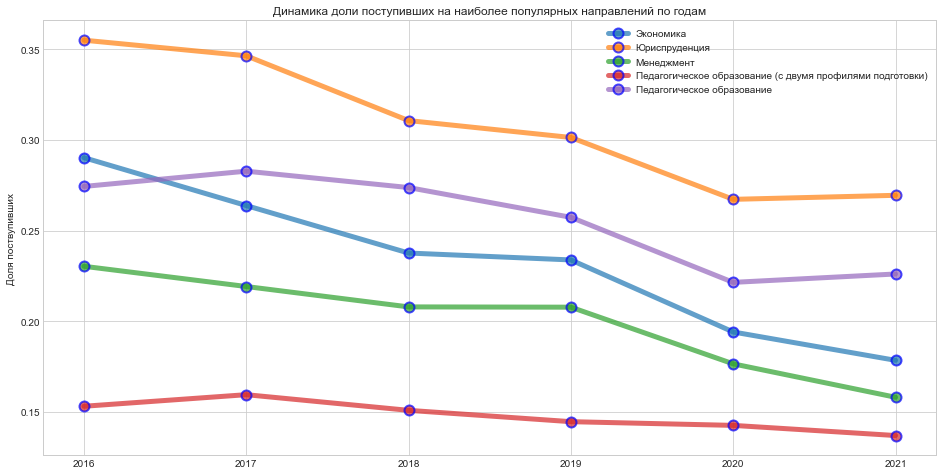

In [369]:
plt.figure(figsize=(16, 8))
plt.title('Динамика доли поступивших на наиболее популярных направлений по годам')
for prog in line_prog:
    try:
        plt.plot(x, year_stat_enr_data.loc[year_stat_enr_data['Educational program'] == prog, 'enr / stats'], 'o-',
             label=prog, alpha=0.7, lw=5, mec='b', mew=2, ms=10)
    except ValueError:
        print(prog)
plt.legend()
plt.ylabel('Доля поствупивших')
plt.grid(True)

In [40]:
current_ed_data = pd.read_excel(open('VPO_database_finita.xlsx', 'rb'),
              sheet_name='Fact Enrollment results')
current_ed_data = current_ed_data[current_ed_data['Year'] == 2021]

In [41]:
current_ed_data = current_ed_data.groupby(['Previous education']).sum()

In [42]:
current_ed_data['total enrolled'] = current_ed_data['Nb enrolled on budget educatoion from students with higher education'] + current_ed_data['Nb enrolled on fee based educatoion students with higher education']


In [46]:
main_ed_equits = current_ed_data['total enrolled'].drop(['Выпускники подготовительных курсов при данной организации', 
                                        'Подтверждено квалификацией "дипломированный специалист"'])

In [49]:
main_ed_equits[['Бакалавр', 'Бакалавр - прошлый год']]

Previous education
Бакалавр                  184643
Бакалавр - прошлый год    127913
Name: total enrolled, dtype: int64

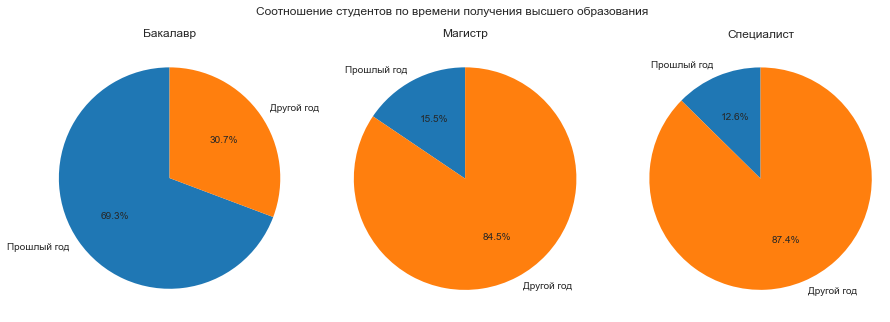

In [129]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('Соотношение студентов по времени получения высшего образования')
for ed, ax in zip(['Бакалавр', 'Магистр', 'Специалист'], (ax1, ax2, ax3)):
    temp_sers = pd.Series(data=[main_ed_equits[ed + ' - прошлый год'], 
                               main_ed_equits[ed] - main_ed_equits[ed + ' - прошлый год']], 
                          index=['Прошлый год', 'Другой год'])
    ax.pie(temp_sers, labels=temp_sers.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(ed)
    ax.axis('equal')
plt.show()

In [36]:
current_ed_data = current_ed_data.drop(['Бакалавр - прошлый год', 'Магистр - прошлый год', 
                                        'Специалист - прошлый год'])

Text(0.5, 1.0, 'Cоотношение общего числа студентов, поступивших в 2021 году, по предыдущему образованию')

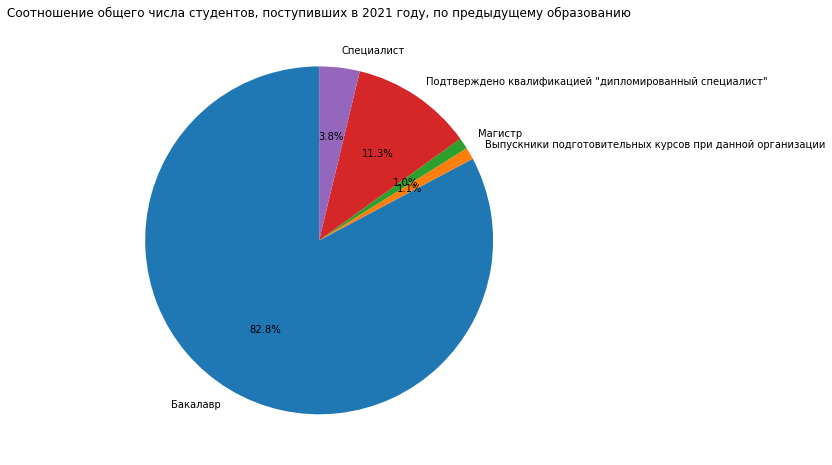

In [39]:
labels = current_ed_data.index
age_sizes = current_ed_data['total enrolled']
plt.figure(figsize=(16, 8))
plt.pie(age_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Cоотношение общего числа студентов, поступивших в 2021 году, по предыдущему образованию')

In [78]:
retired_data = pd.read_excel(open('VPO_database_finita.xlsx', 'rb'),
              sheet_name='Fact Moving')
retired_data = retired_data[retired_data['Year'] == 2021]

In [81]:
retired_data = retired_data.groupby(['Reenrollment type']).sum().reset_index()

In [84]:
retired_data = retired_data.drop([2, 8, 9, 10, 11, 12, 13])

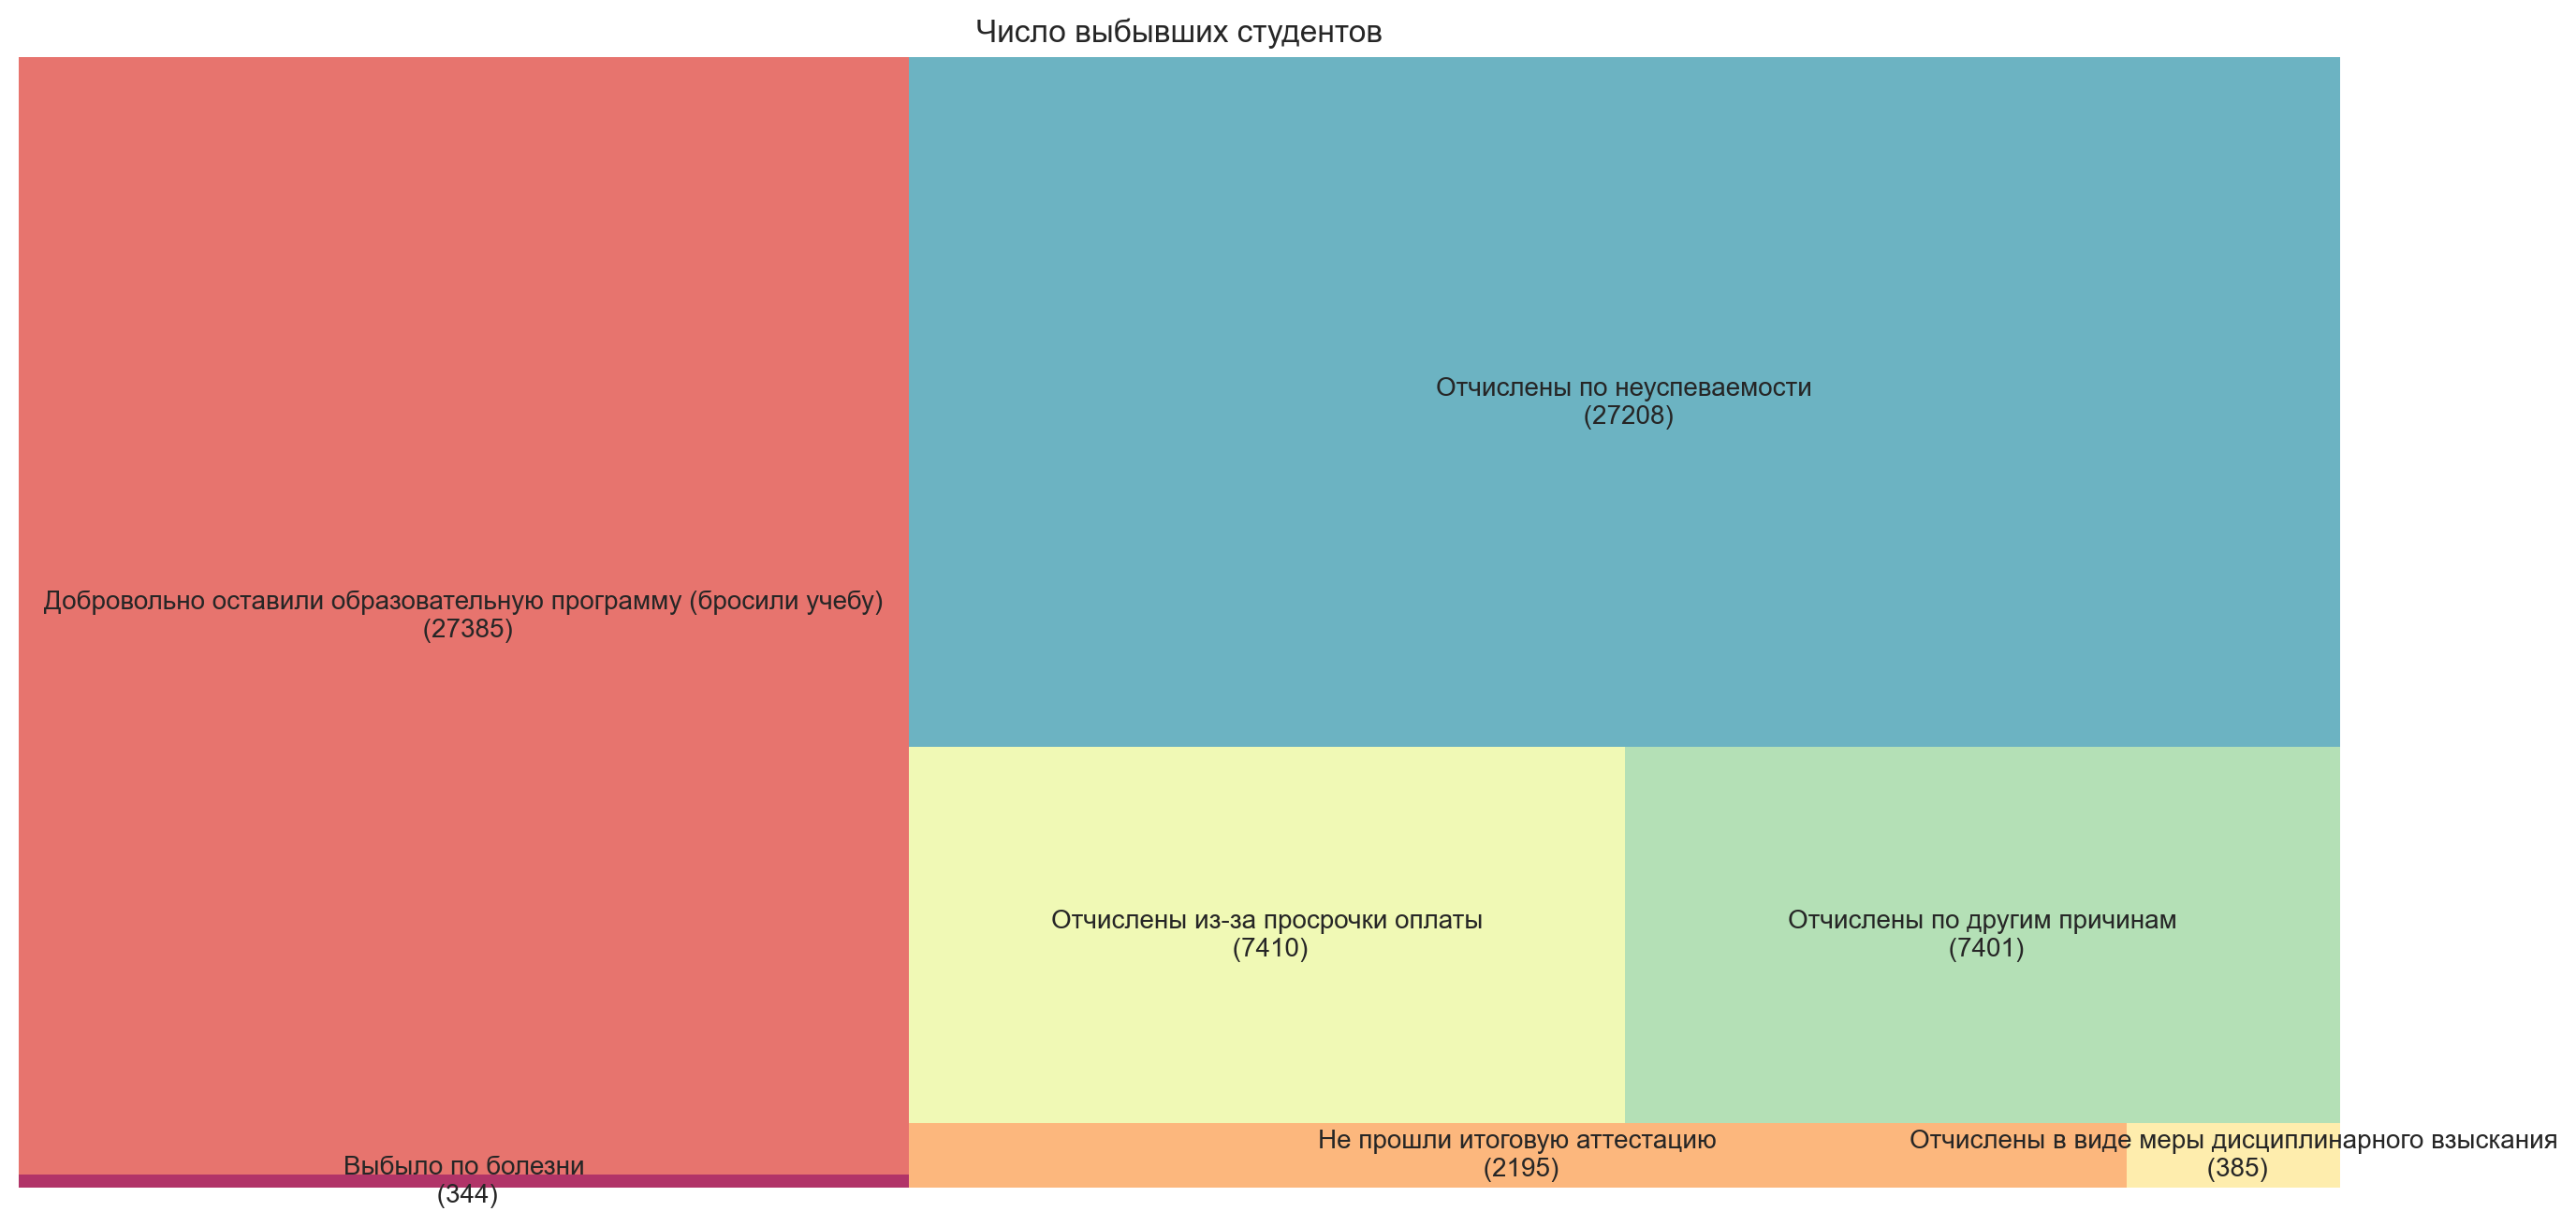

In [105]:
labels = retired_data.apply(lambda x: str(x[0]) + "\n (" + str(x[2]) + ")", axis=1)
sizes = retired_data['Nb students reinrolled in total'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(16,8), dpi= 200)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Число выбывших студентов')
plt.axis('off')
plt.show()

In [114]:
scholarship_data = pd.read_excel(open('VPO_database_finita.xlsx', 'rb'),
              sheet_name='Fact Scholarship')
scholarship_data = scholarship_data[scholarship_data['Year'] == 2021]

In [115]:
scholarship_data = scholarship_data.groupby(['Scholarship conditions']).sum().reset_index()

In [117]:
scholarship_data = scholarship_data.drop([1, 4, 5, 6, 8, 9])

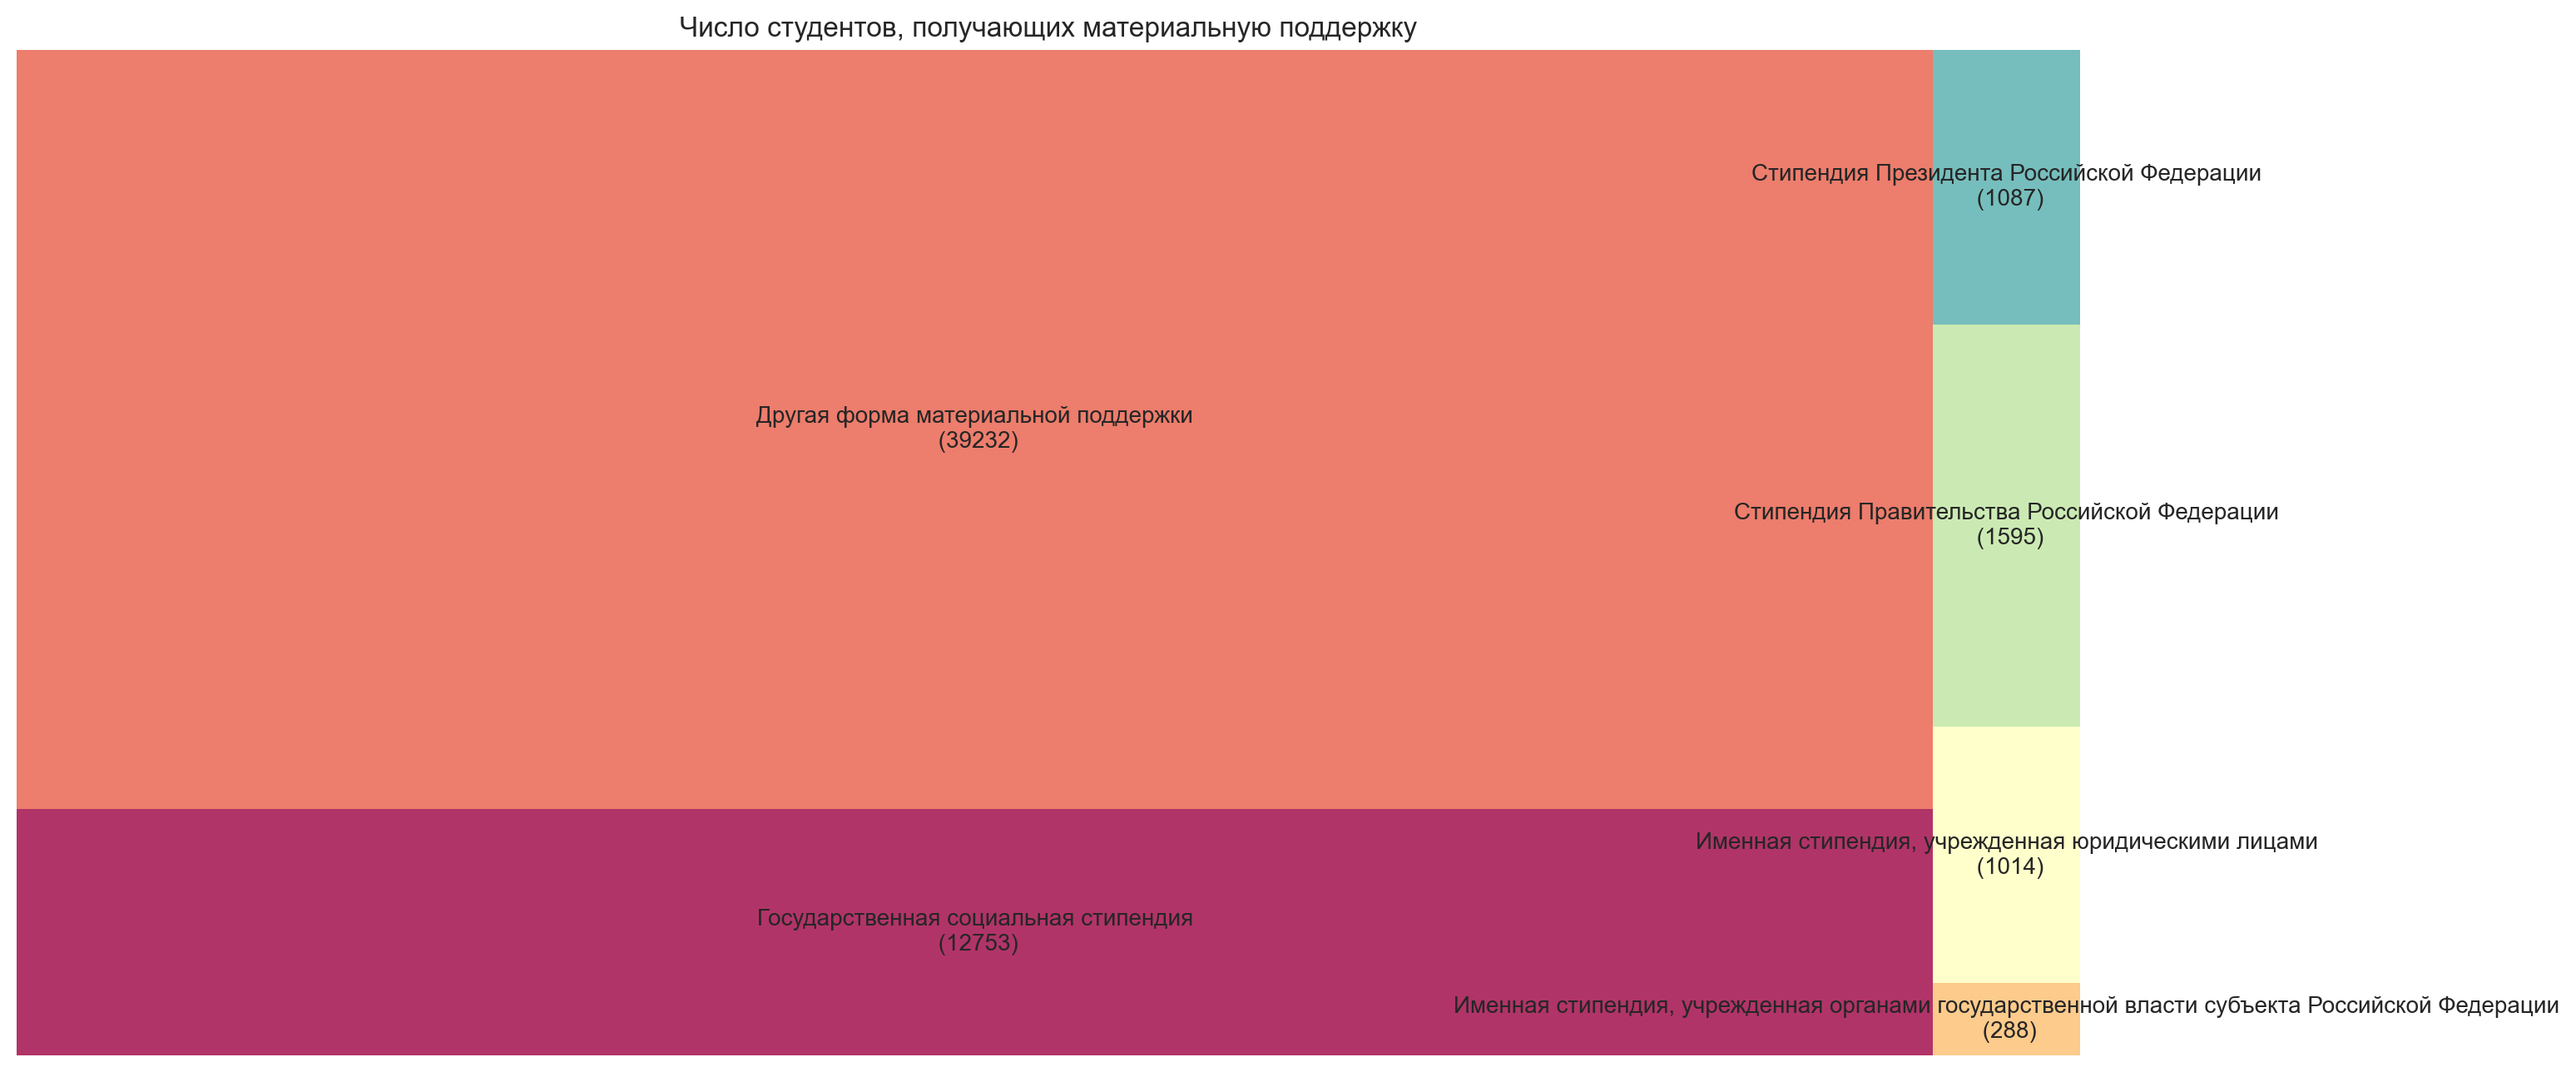

In [118]:
labels = scholarship_data.apply(lambda x: str(x[0]) + "\n (" + str(x[2]) + ")", axis=1)
sizes = scholarship_data['Nb of students who receive a gov academic scholarship'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(16,8), dpi= 200)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Число студентов, получающих материальную поддержку')
plt.axis('off')
plt.show()

In [130]:
ed_form_year_data = pd.read_excel(open('VPO_database_finita.xlsx', 'rb'),
              sheet_name='Fact Age distribution')

In [145]:
ed_form_year_data = ed_form_year_data.groupby(['Year', 'Program format type']).sum().reset_index()

/var/folders/wm/r88x234s74db86mtqppjmvq00000gn/T/ipykernel_19588/363580237.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2015, 2016, 2017, 2018, 2019, 2020, 2021], fontsize=12)


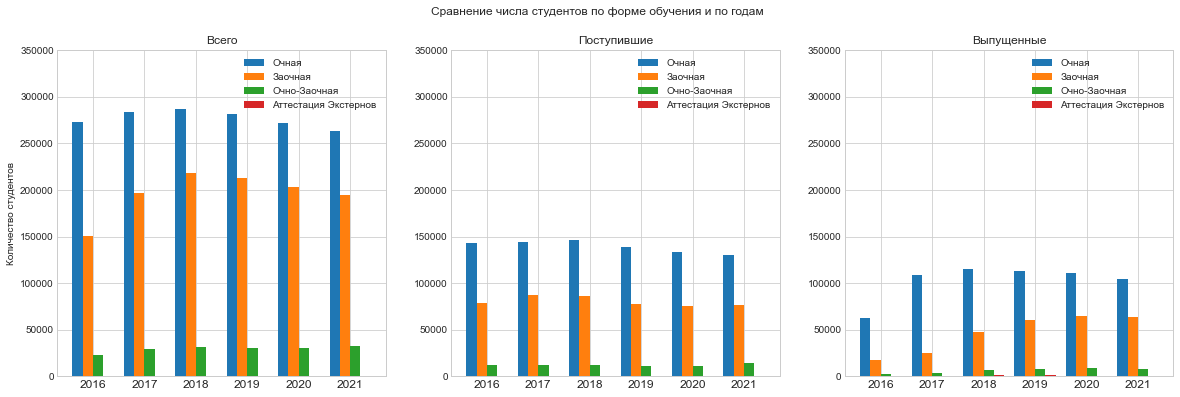

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(20)
for ax in (ax1, ax2, ax3):
    ax.set_ylim(0, 350000)
fig.suptitle('Сравнение числа студентов по форме обучения и по годам')
labels = ed_form_year_data['Year'].unique()
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
for group, ax, name in zip(['Nb students totally', 'Nb enrolled totally', 'Nb graduated totally'], 
                           (ax1, ax2, ax3), ['Всего', 'Поступившие', 'Выпущенные']):
    rects1 = ax.bar(x-width*1.5, ed_form_year_data.loc[ed_form_year_data['Program format type'] == 'Очная', group],
                   width, label='Очная')
    rects2 = ax.bar(x-width/2, ed_form_year_data.loc[ed_form_year_data['Program format type'] == 'Заочная', group],
                   width, label='Заочная')
    rects3 = ax.bar(x+width/2, ed_form_year_data.loc[ed_form_year_data['Program format type'] == 'Очно-Заочная', 
                                                     group], width, label='Очно-Заочная')
    rects4 = ax.bar(x+width*1.5, 
                    ed_form_year_data.loc[ed_form_year_data['Program format type'] == 'Аттестация Экстернов', 
                                          group], width, label='Аттестация Экстернов')
    ax.set_title(name)
    ax.set_xticklabels([2015, 2016, 2017, 2018, 2019, 2020, 2021], fontsize=12)
    ax.legend()
ax1.set_ylabel('Количество студентов') 
plt.show()

In [279]:
reg_prog_data = pd.read_excel(open('VPO_database_v9.xlsx', 'rb'),
              sheet_name='Fact Statements and enrollments')

In [280]:
reg_prog_data = reg_prog_data[reg_prog_data['Educational level'] == 'Магистратура']
reg_prog_data = reg_prog_data[reg_prog_data.Year == 2021]

In [281]:
sum_reg_data = reg_prog_data.groupby(['Region']).sum()
sum_reg_data = sum_reg_data.sort_values(by='Nb total enrolled', ascending=False).head(5)

In [283]:
reg_prog_data = reg_prog_data.loc[reg_prog_data['Region'].isin(sum_reg_data.index)]
reg_prog_data = reg_prog_data.groupby(['Region', 'Educational program']).sum().reset_index()
reg_prog_data = reg_prog_data[reg_prog_data['Nb total enrolled'] > 400].sort_values(by='Nb total enrolled', 
                                                                                                 ascending=False)
reg_prog_data

,Region,Educational program,Year,Nb target training statements,Nb special right statements,Nb fee based statements,Nb total enrolled,Nb enrolled on payed from federal budget study,Nb enrolled with disabilities on payed from federal budget study,Nb enrolled on payed from sudject budget study,...,Nb enrolled on fee based study,Nb enrolled women,Nb students with complete education in other region,Nb students with payed from federal budget education in other region,Nb students with complete education in other country,Nb students with from federal budget education in other country,Nb foreign students,Nb foreign students on fee based study,Nb students from CIS,Nb students from CIS on fee based study
45,г.Москва,Юриспруденция,12126,163.0,1.0,12793.0,6558.0,1426.0,10.0,120.0,...,5012.0,3600.0,1715.0,443.0,180.0,7.0,241.0,227.0,191.0,179.0
22,г.Москва,Менеджмент,12126,26.0,0.0,9309.0,4618.0,831.0,3.0,0.0,...,3787.0,2205.0,889.0,198.0,407.0,11.0,675.0,662.0,267.0,257.0
30,г.Москва,Психология,12126,4.0,0.0,7433.0,4184.0,390.0,8.0,36.0,...,3758.0,3610.0,1343.0,136.0,376.0,4.0,364.0,358.0,271.0,266.0
42,г.Москва,Экономика,12126,66.0,0.0,8005.0,3241.0,1032.0,5.0,20.0,...,2189.0,1634.0,718.0,270.0,210.0,23.0,282.0,246.0,155.0,120.0
13,г.Москва,Государственное и муниципальное управление,12126,28.0,0.0,4863.0,2454.0,418.0,1.0,20.0,...,2016.0,1044.0,506.0,131.0,65.0,4.0,172.0,167.0,83.0,78.0
24,г.Москва,Педагогическое образование,10105,6.0,0.0,3096.0,2175.0,1100.0,3.0,628.0,...,447.0,1613.0,664.0,408.0,151.0,44.0,130.0,101.0,103.0,74.0
61,г.Санкт-Петербург,Юриспруденция,10105,36.0,0.0,3602.0,1744.0,218.0,2.0,5.0,...,1521.0,948.0,516.0,103.0,64.0,2.0,89.0,87.0,78.0,76.0
16,г.Москва,Информатика и вычислительная техника,8084,33.0,0.0,859.0,1583.0,1257.0,7.0,0.0,...,326.0,354.0,226.0,106.0,97.0,14.0,136.0,93.0,72.0,29.0
53,г.Санкт-Петербург,Педагогическое образование,6063,22.0,0.0,1445.0,1387.0,709.0,2.0,210.0,...,468.0,1027.0,459.0,365.0,148.0,6.0,244.0,226.0,19.0,3.0
9,Ростовская область,Юриспруденция,10105,12.0,0.0,2184.0,1331.0,192.0,1.0,0.0,...,1139.0,713.0,246.0,27.0,37.0,1.0,68.0,66.0,49.0,47.0


In [284]:
index = sum_reg_data.index
tot_enr = sum_reg_data['Nb total enrolled']

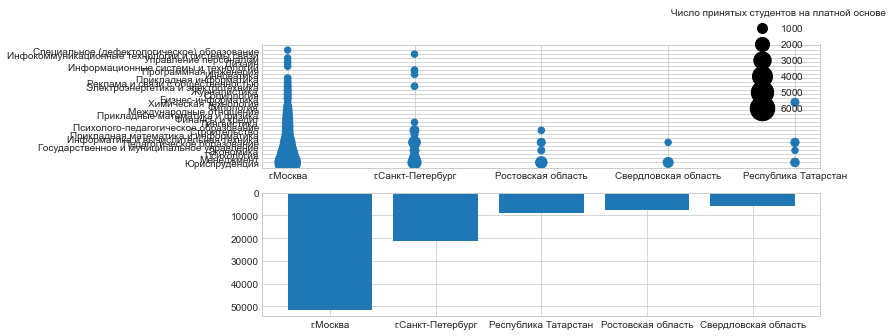

In [293]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(20)
fig.set_figwidth(10)
scatter = ax1.scatter('Region', 'Educational program', data=reg_prog_data, 
                s=reg_prog_data['Nb total enrolled']/10)
handles, labels = scatter.legend_elements(prop="sizes", num=5)
for i in range(len(labels)):
    labels[i] = labels[i][:labels[i].find('0')+1] + '0' + labels[i][labels[i].find('0')+1:]
legend2 = fig.legend(handles, labels, loc="upper right", title="Число принятых студентов на платной основе")

ax2.bar(index, tot_enr)
ax2.invert_yaxis()
ax2.figure.set_size_inches(10, 5)
plt.show()

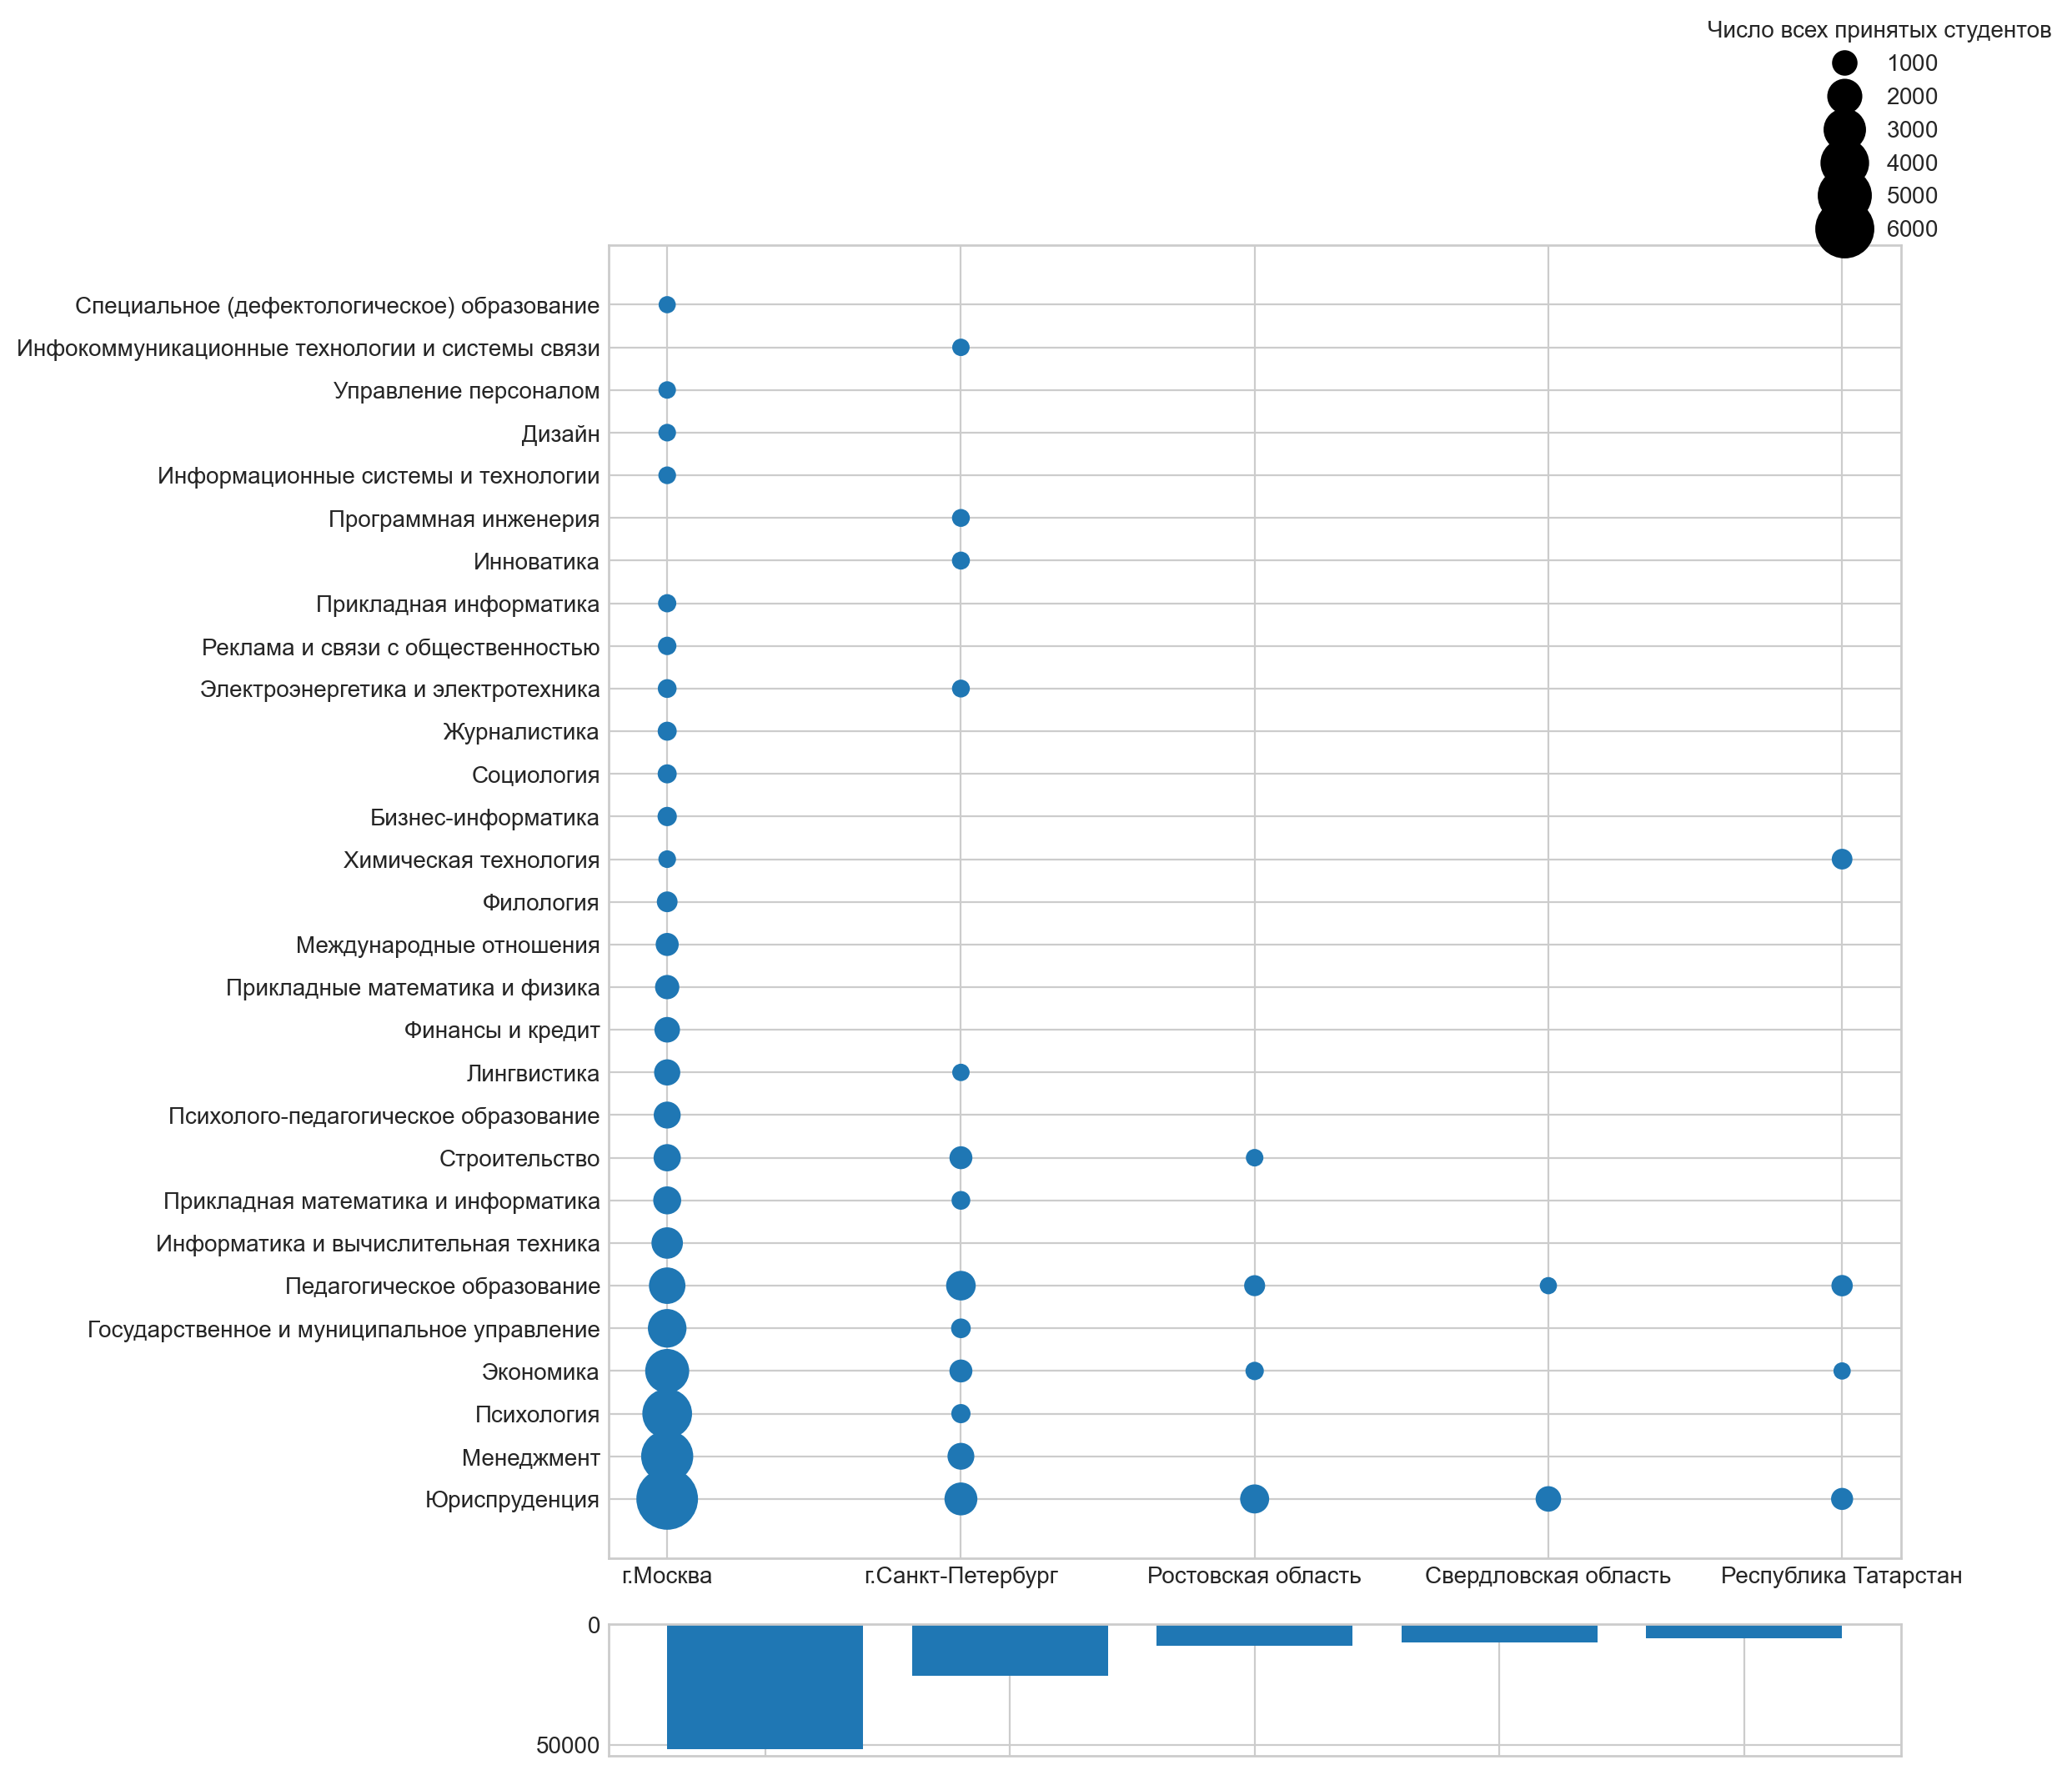

In [295]:
fig = plt.figure(figsize=(10, 12), dpi= 200)
grid = plt.GridSpec(8, 8, hspace=0.5, wspace=0.2)
ax_main = fig.add_subplot(grid[:-1, :])
ax_bottom = fig.add_subplot(grid[-1, 0:], xticklabels=[])


scatter = ax_main.scatter('Region', 'Educational program', data=reg_prog_data, 
                s=reg_prog_data['Nb total enrolled']/10)
handles, labels = scatter.legend_elements(prop="sizes", num=5)
for i in range(len(labels)):
    labels[i] = labels[i][:labels[i].find('0')+1] + '0' + labels[i][labels[i].find('0')+1:]
legend2 = fig.legend(handles, labels, loc="upper right", title="Число всех принятых студентов")

ax_bottom.bar(index, tot_enr)
ax_bottom.invert_yaxis()

plt.show()

In [65]:
area_subject = pd.read_csv('area_subject.csv', sep=',')
enr_story = pd.read_excel(open('VPO_database_v11.xlsx', 'rb'),
              sheet_name='Fact Enrollment results')
area_subject = area_subject[['Area', 'Region']]
enr_story = enr_story.join(area_subject.set_index('Region'), on='Region')
enr_story.loc[enr_story.Region == 'г.Москва', 'Area'] = enr_story['Region']
enr_story.loc[enr_story.Region == 'г.Санкт-Петербург', 'Area'] = enr_story['Region']
sum_enr_story = enr_story.groupby(['Year', 'Area']).sum().reset_index()
sum_enr_story['stat total'] = sum_enr_story['Nb budget statements from students with higher education'] + sum_enr_story['Nb fee based statements from students with higher education']
sum_enr_story['enr total'] = sum_enr_story['Nb enrolled on budget educatoion from students with higher education'] + sum_enr_story['Nb enrolled on fee based educatoion students with higher education']

Text(0, 0.5, 'Количество принятых студентов')

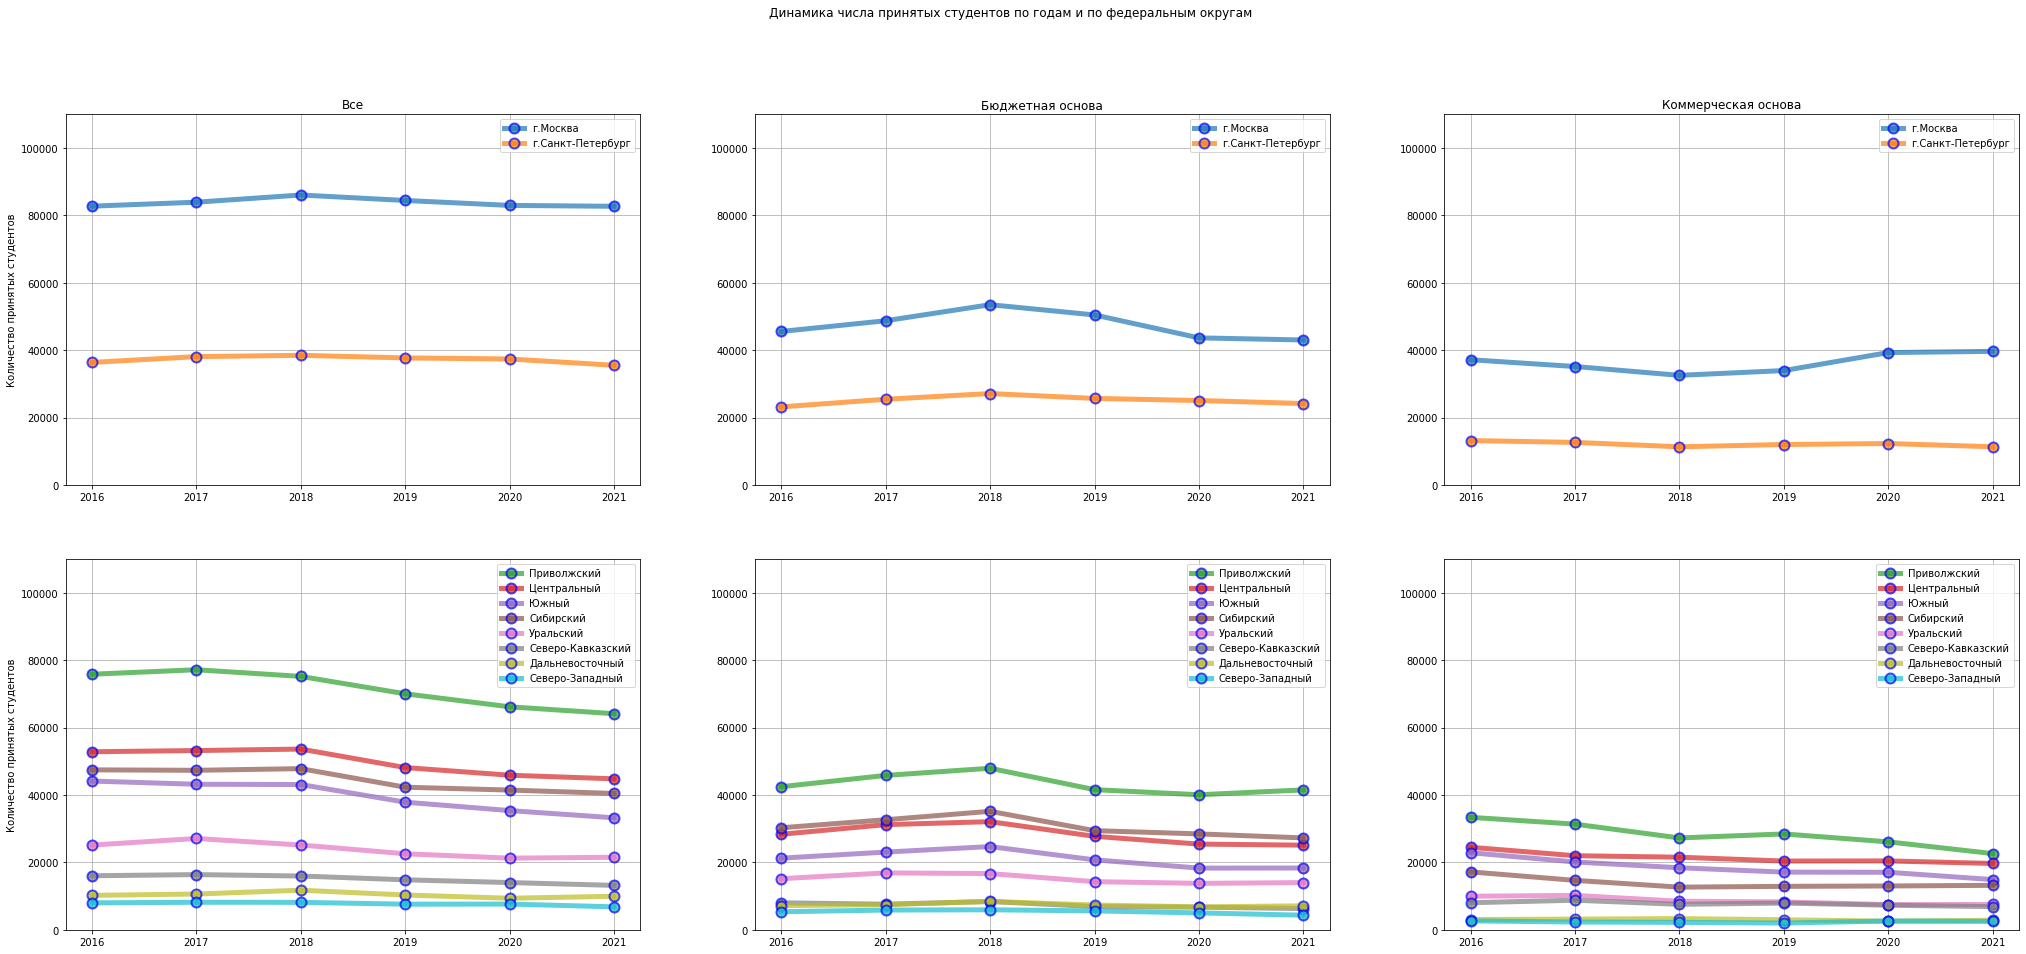

In [74]:
line_areas = sum_enr_story[sum_enr_story['Year'] == 2016].sort_values(by='Nb enrolled on fee based educatoion students with higher education', 
                                                                                ascending=False)['Area'].drop(index=[8, 9])
colors = ['tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
legend_labels = []
for area in line_areas:
    legend_labels.append(area[:area.find(' ')])
x = sum_enr_story['Year'].unique()
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(35)
for i in range(3):
    axs[0, i].set_ylim(0, 110000)
    axs[1, i].set_ylim(0, 110000)
fig.suptitle('Динамика числа принятых студентов по годам и по федеральным округам')
for ax, name, column in zip([axs[0, 0], axs[0, 1], axs[0, 2]], ['Все', 'Бюджетная основа', 'Коммерческая основа'], 
              ['enr total', 'Nb enrolled on budget educatoion from students with higher education', 
               'Nb enrolled on fee based educatoion students with higher education']):
    for area in ['г.Москва', 'г.Санкт-Петербург']:
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], 'o-', label=area, alpha=0.7, lw=5, mec='b', 
            mew=2, ms=10)
    ax.set_title(name)
    ax.legend()
    ax.grid()
for ax, column in zip([axs[1, 0], axs[1, 1], axs[1, 2]], 
              ['enr total', 'Nb enrolled on budget educatoion from students with higher education', 
               'Nb enrolled on fee based educatoion students with higher education']):
    for area, color in zip(line_areas, colors):
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], label=area, alpha=0.7, lw=5, mec='b', mew=2,
                ms=10, color=color, marker='o')
    ax.legend(labels=legend_labels)
    ax.grid()
axs[0, 0].set_ylabel('Количество принятых студентов')
axs[1, 0].set_ylabel('Количество принятых студентов') 

Text(0, 0.5, 'Количество полученных заявок')

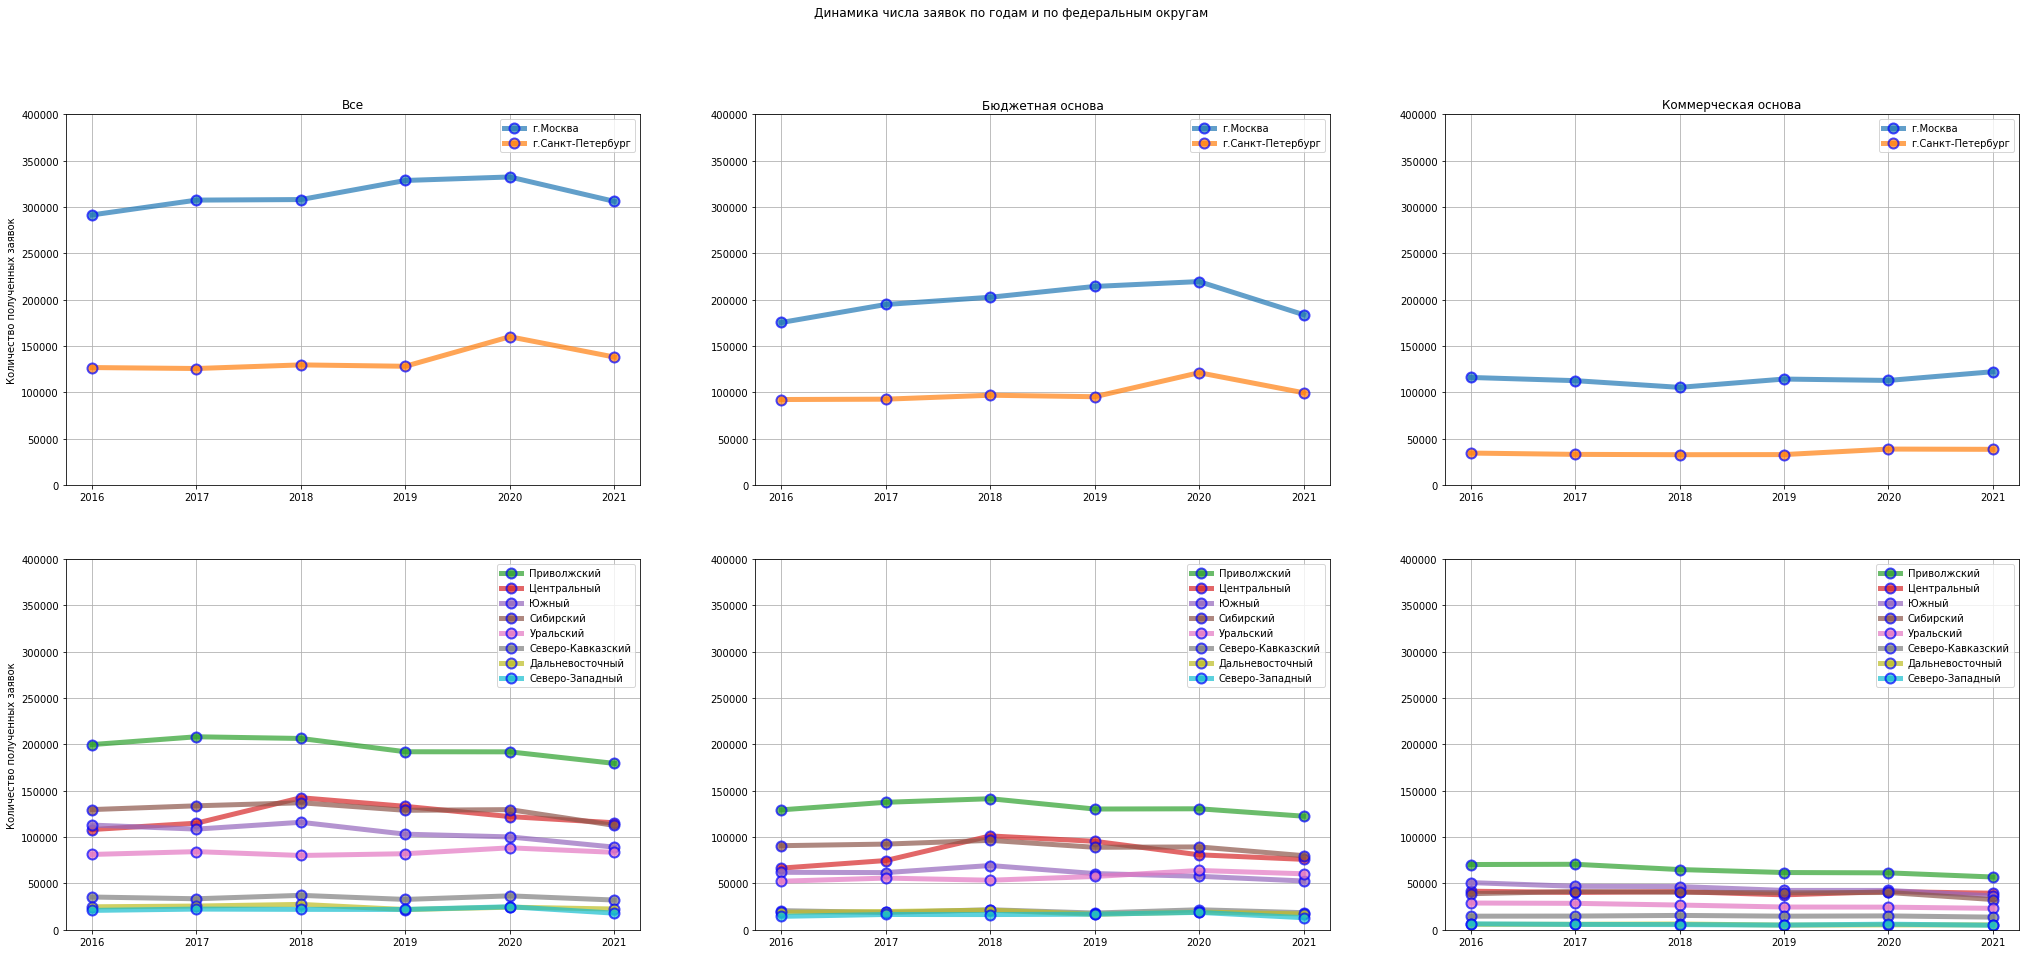

In [75]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(35)
for i in range(3):
    axs[0, i].set_ylim(0, 400000)
    axs[1, i].set_ylim(0, 400000)
fig.suptitle('Динамика числа заявок по годам и по федеральным округам')
for ax, name, column in zip([axs[0, 0], axs[0, 1], axs[0, 2]], ['Все', 'Бюджетная основа', 'Коммерческая основа'], 
              ['stat total', 'Nb budget statements from students with higher education', 
               'Nb fee based statements from students with higher education']):
    for area in ['г.Москва', 'г.Санкт-Петербург']:
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], 'o-', label=area, alpha=0.7, lw=5, mec='b', 
            mew=2, ms=10)
    ax.set_title(name)
    ax.legend()
    ax.grid()
for ax, name, column in zip([axs[1, 0], axs[1, 1], axs[1, 2]], ['Все', 'Бюджетные', 'Платные'], 
              ['stat total', 'Nb budget statements from students with higher education', 
               'Nb fee based statements from students with higher education']):
    for area, color in zip(line_areas, colors):
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], label=area, alpha=0.7, lw=5, mec='b', mew=2,
                ms=10, color=color, marker='o')
    ax.legend(labels=legend_labels)
    ax.grid()
axs[0, 0].set_ylabel('Количество полученных заявок')
axs[1, 0].set_ylabel('Количество полученных заявок') 

In [76]:
sum_enr_story['all prop'] = sum_enr_story['enr total'] / sum_enr_story['stat total']
sum_enr_story['budget prop'] = sum_enr_story['Nb enrolled on budget educatoion from students with higher education'] / sum_enr_story['Nb budget statements from students with higher education']
sum_enr_story['fee prop'] = sum_enr_story['Nb enrolled on fee based educatoion students with higher education'] / sum_enr_story['Nb fee based statements from students with higher education']

Text(0, 0.5, 'Доля поступивших')

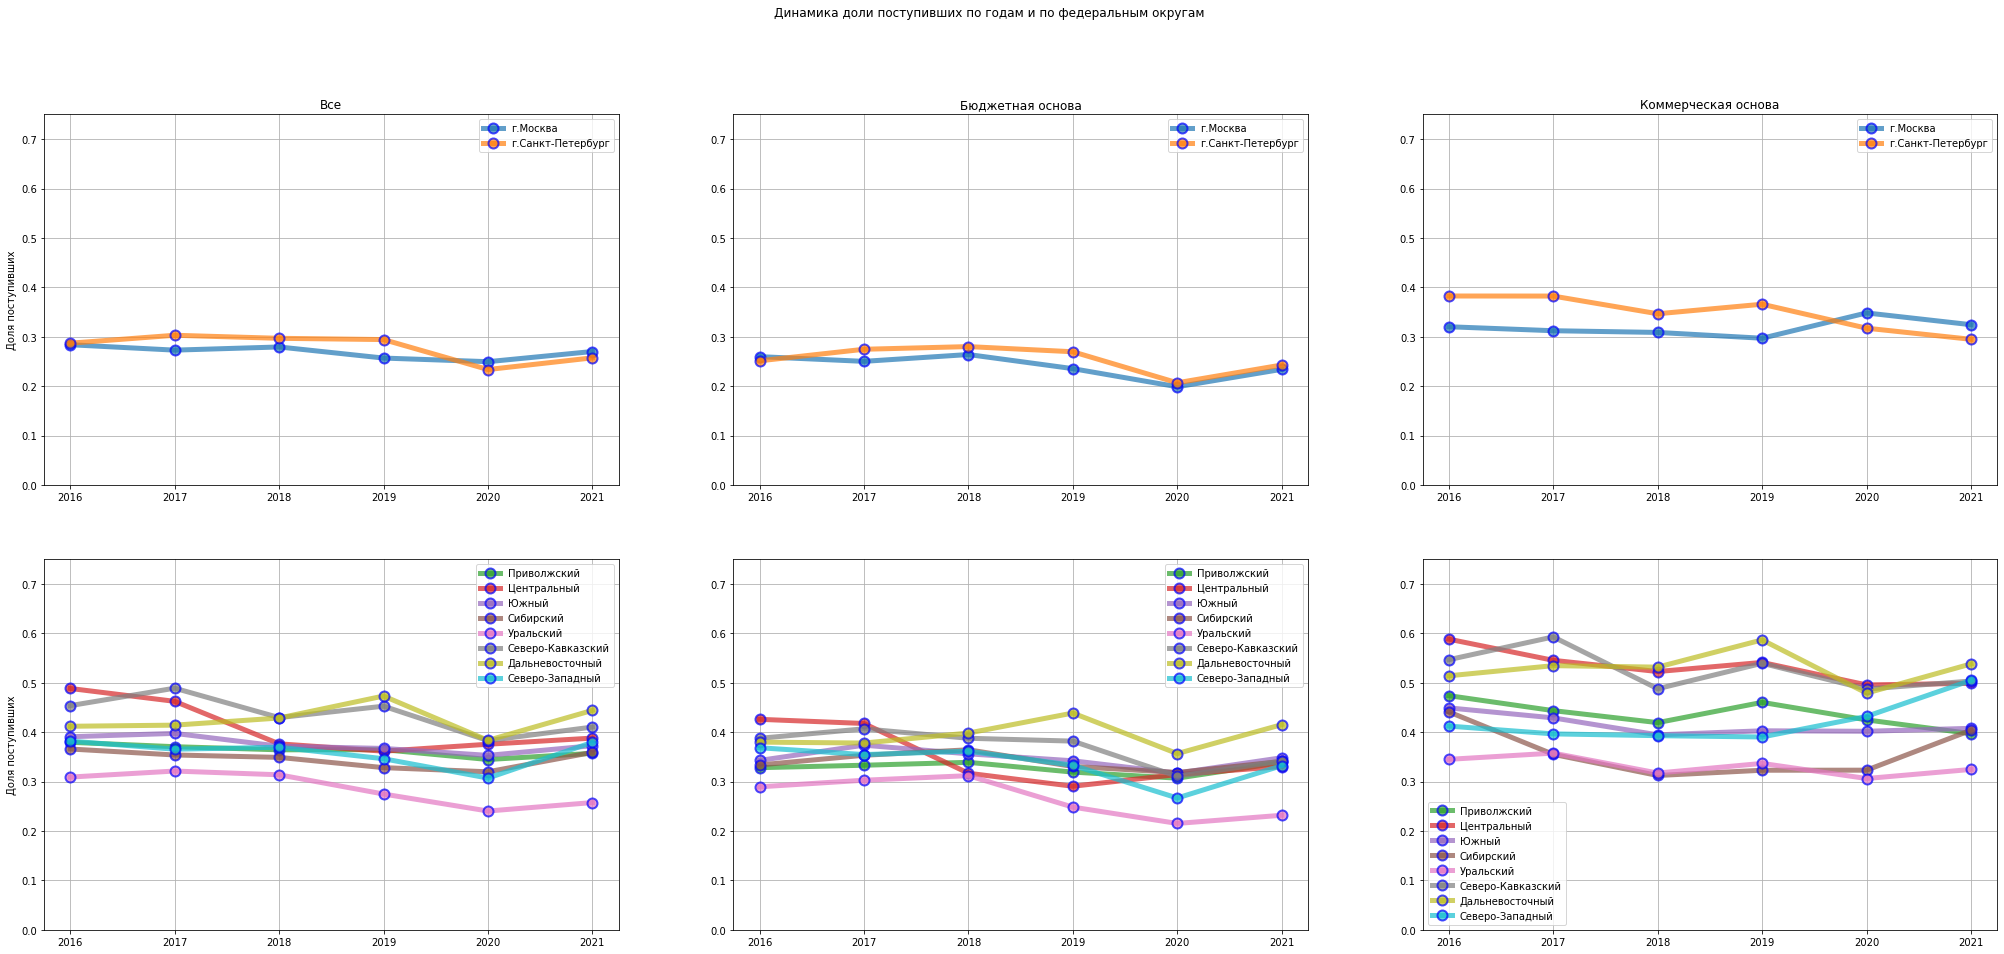

In [77]:
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(35)
for i in range(3):
    axs[0, i].set_ylim(0, 0.75)
    axs[1, i].set_ylim(0, 0.75)
fig.suptitle('Динамика доли поступивших по годам и по федеральным округам')
for ax, name, column in zip([axs[0, 0], axs[0, 1], axs[0, 2]], ['Все', 'Бюджетная основа', 'Коммерческая основа'], 
                            ['all prop', 'budget prop', 'fee prop']):
    for area in ['г.Москва', 'г.Санкт-Петербург']:
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], 'o-', label=area, alpha=0.7, lw=5, mec='b', 
            mew=2, ms=10)
    ax.set_title(name)
    ax.legend()
    ax.grid()
for ax, name, column in zip([axs[1, 0], axs[1, 1], axs[1, 2]], ['Все', 'Бюджетная основа', 'Коммерческая основа'], 
                            ['all prop', 'budget prop', 'fee prop']):
    for area, color in zip(line_areas, colors):
        ax.plot(x, sum_enr_story.loc[sum_enr_story.Area == area, column], label=area, alpha=0.7, lw=5, mec='b', mew=2,
                ms=10, color=color, marker='o')
    ax.legend(labels=legend_labels)
    ax.grid()
axs[0, 0].set_ylabel('Доля поступивших')
axs[1, 0].set_ylabel('Доля поступивших') 